# **Notebook zur Evaluation - Scan-Prozess**
***

In [115]:
from FC.FC_save_load_global_hook_dict import load_csv_to_dict
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
import numpy as np
from scipy.stats import norm
from sklearn.mixture import GaussianMixture
import os
import matplotlib.cm as cm

***
## **Wiederholungsgenauigkeit**

**Dicts laden**

In [116]:
dir_path = '/home/mo/Thesis/Evaluation/1_Scan-Prozess/6_Wiederholungsgenauigkeit/HakenmodellA/csv'

In [117]:
dicts_list = []

for testrun_folder in sorted(os.listdir(dir_path)):
    testrun_folder_path = os.path.join(dir_path, testrun_folder)

    if os.path.isdir(testrun_folder_path) and testrun_folder.isdigit():
        data = os.listdir(testrun_folder_path)
        csv_data = [f for f in data if f.endswith('.csv')]

        if len(csv_data) == 1:
            csv_path = os.path.join(testrun_folder_path, csv_data[0])
            dicts_list.append(load_csv_to_dict(csv_path))
        else:
            print(f"No CSV file in: {testrun_folder_path}")

print(f"{len(dicts_list)} Dictionaries found...")

20 Dictionaries found...


**Mittelwert der Koordinaten pro Haken berechnen**

In [118]:
def calculate_mean(dicts_list = None):
    """
    Berechnet für alle Koordnaten (Spitze und Senke) den Mittelwert X_mean, Y_mean, Z_mean für jeden Haken"
    """
    mean_xyz_tip_in_workframe = []
    mean_xyz_lowpoint_in_workframe = []

    for hook_idx in range(len(dicts_list[0])):
        # hole Haken x aus allen dicts und berechne Summe
        sum_xyz_tip = np.zeros(3)
        sum_xyz_lowpoint = np.zeros(3)
        
        dict_key = str(hook_idx + 1)
        for dict in (dicts_list):
            xyz_tip_in_workframe = dict[dict_key]['xyz_tip_in_workframe']
            xyz_lowpoint_in_workframe = dict[dict_key]['xyz_lowpoint_in_workframe']
            sum_xyz_tip += xyz_tip_in_workframe
            sum_xyz_lowpoint += xyz_lowpoint_in_workframe
        
        # Berechne Mittelwert für Haken x und hänge an Ergebnis-Liste dran
        tip_mean = sum_xyz_tip / len(dicts_list)
        lowpoint_mean = sum_xyz_lowpoint / len(dicts_list)
        mean_xyz_tip_in_workframe.append(tip_mean)
        mean_xyz_lowpoint_in_workframe.append(lowpoint_mean)

    return mean_xyz_tip_in_workframe, mean_xyz_lowpoint_in_workframe

**Werte als Scatter plotten**

In [119]:
import numpy as np
import matplotlib.pyplot as plt

def plot_values(dicts_list=None, tip_mean_list=None, lowpoint_mean_list=None):
    """
    Plottet die x, y, z-Werte für jeden Haken-Tip und -Lowpoint in einem 2x3 Plot.
    Links: Tip-Koordinaten (x, y, z)
    Rechts: Lowpoint-Koordinaten (x, y, z)
    """
    num_hooks = len(dicts_list[0])
    num_samples = len(dicts_list)

    tips = np.zeros((num_hooks, num_samples, 3))       
    lowpoints = np.zeros((num_hooks, num_samples, 3))  

    for hook_idx in range(num_hooks):
        dict_key = str(hook_idx + 1)
        for sample_idx, d in enumerate(dicts_list):
            tips[hook_idx, sample_idx] = d[dict_key]['xyz_tip_in_workframe']
            lowpoints[hook_idx, sample_idx] = d[dict_key]['xyz_lowpoint_in_workframe']

    fig, axs = plt.subplots(3, 2, figsize=(12, 8), sharex=True)
    fig.suptitle('Wiederholungsgenauigkeit bei gleichem Hakenmodell bzw. Setup', fontsize=16)
    coord_labels = ['x', 'y', 'z']

    legend_handles = []
    legend_labels = []

    for i in range(3):  
        # Tip-Daten
        sc1 = axs[i, 0].scatter(np.repeat(np.arange(1, num_hooks + 1), num_samples), 
                                tips[:, :, i].flatten(), alpha=0.6, label='Koordinate')
        if tip_mean_list:
            ln1, = axs[i, 0].plot(range(1, num_hooks + 1),
                                  [tip_mean_list[hook_idx][i] for hook_idx in range(num_hooks)],
                                  label='Mittelwert', linestyle='--', color='red')
        axs[i, 0].set_ylabel(f'Spitze {coord_labels[i]} [mm]')
        axs[i, 0].grid()

        # Lowpoint-Daten
        sc2 = axs[i, 1].scatter(np.repeat(np.arange(1, num_hooks + 1), num_samples), 
                                lowpoints[:, :, i].flatten(), alpha=0.6, label='Koordinate')
        if lowpoint_mean_list:
            ln2, = axs[i, 1].plot(range(1, num_hooks + 1),
                                  [lowpoint_mean_list[hook_idx][i] for hook_idx in range(num_hooks)],
                                  label='Mittelwert', linestyle='--', color='red')
        axs[i, 1].set_ylabel(f'Senke {coord_labels[i]} [mm]')
        axs[i, 1].grid()

        if i == 0:
            legend_handles.extend([sc1, ln1])
            legend_labels.extend(['Koordinate', 'Mittelwert'])

    for ax in axs[2]:
        ax.set_xlabel('Haken-Instanz')

    # Gemeinsame Legende rechts außerhalb der Subplots
    fig.legend(legend_handles, legend_labels, loc='center right', bbox_to_anchor=(1.12, 0.5))
    # fig.legend(
    #     legend_handles, legend_labels,
    #     loc='center left',
    #     bbox_to_anchor=(1.12, 0.5),
    #     labelspacing=0.3,  # Weniger Abstand zwischen Labels
    #     handlelength=2.0,  # Kürzere Linien
    #     borderaxespad=0.5,
    #     fontsize='small'
    # )

    plt.tight_layout(rect=[0, 0.03, 0.95, 0.95])  # Platz für Legende lassen
    # plt.tight_layout(rect=[0, 0.03, 0.92, 0.95])
    plt.show()

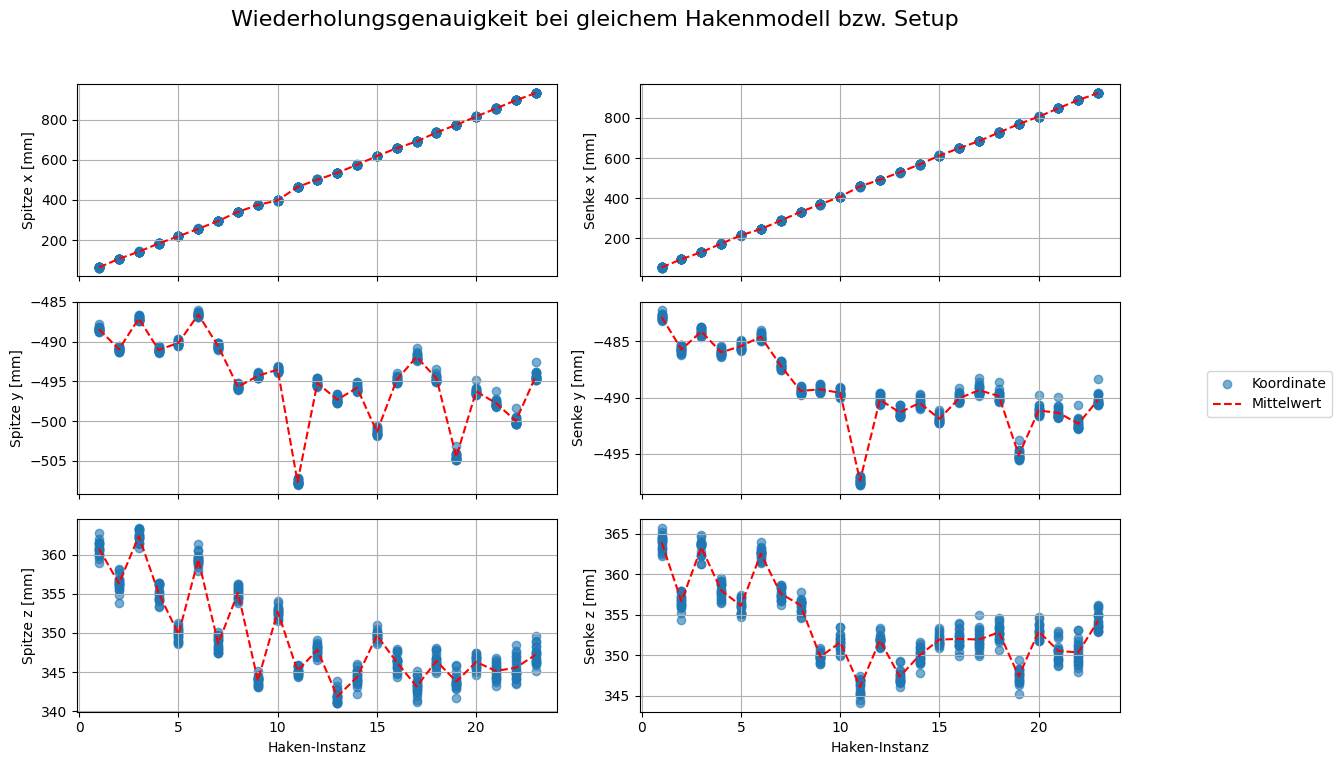

In [120]:
mean_xyz_tip_in_workframe, mean_xyz_lowpoint_in_workframe = calculate_mean(dicts_list)
plot_values(dicts_list = dicts_list, tip_mean_list = mean_xyz_tip_in_workframe, lowpoint_mean_list = mean_xyz_lowpoint_in_workframe)

### **Wahrscheinlichkeits-Verteilung**

**Berechnung der Treffer-Wahrscheinlichkeit - Spitze wird als unendlich kleiner Punkt angenommen**

In [121]:
def probability_within_slot_gmm(dicts_list, hook_num=1, slot_length=12, slot_width=5, slot_depth=10, n_components=2):
    coords = {'x': [], 'y': [], 'z': []}
    for d in dicts_list:
        pt = d[str(hook_num)]['xyz_tip_in_workframe']
        coords['x'].append(pt[0])
        coords['y'].append(pt[1])
        coords['z'].append(pt[2])

    slot_half = {
        'x': slot_width / 2,
        'y': slot_depth / 2,
        'z': slot_length / 2
    }

    total_prob = 1.0
    for axis in ['x', 'y', 'z']:
        data = np.array(coords[axis]).reshape(-1, 1)
        gmm = GaussianMixture(n_components=n_components, random_state=0)
        gmm.fit(data)

        weights = gmm.weights_
        means = gmm.means_.flatten()
        stds = np.sqrt(gmm.covariances_.flatten())
        center = np.mean(data)
        lower = center - slot_half[axis]
        upper = center + slot_half[axis]

        # Komponentensumme der Wahrscheinlichkeit
        prob_axis = 0
        for w, mu, sigma in zip(weights, means, stds):
            cdf_upper = norm.cdf((upper - mu) / sigma)
            cdf_lower = norm.cdf((lower - mu) / sigma)
            prob_axis += w * (cdf_upper - cdf_lower)

        print(f"{axis}-Achse: μ-Komponenten = {np.round(means, 2)}, σ-Komponenten = {np.round(stds, 2)}, Gewichte = {np.round(weights, 2)}")
        print(f"Zielbereich: [{lower:.2f}, {upper:.2f}] → Wahrscheinlichkeit = {prob_axis*100:.2f} %\n")
        total_prob *= prob_axis

    print(f"Gesamte Wahrscheinlichkeit für das Treffen der Hakenspitze (GMM): {total_prob*100:.2f} %\n")
    return total_prob

In [122]:
prob = probability_within_slot_gmm(dicts_list, hook_num=8, slot_length=13, slot_width=7, slot_depth=10, n_components=2)

x-Achse: μ-Komponenten = [340.63 339.36], σ-Komponenten = [0.66 0.09], Gewichte = [0.83 0.17]
Zielbereich: [336.91, 343.91] → Wahrscheinlichkeit = 100.00 %

y-Achse: μ-Komponenten = [-495.88 -495.4 ], σ-Komponenten = [0.14 0.16], Gewichte = [0.61 0.39]
Zielbereich: [-500.69, -490.69] → Wahrscheinlichkeit = 100.00 %

z-Achse: μ-Komponenten = [354.5  355.72], σ-Komponenten = [0.4  0.35], Gewichte = [0.5 0.5]
Zielbereich: [348.61, 361.61] → Wahrscheinlichkeit = 100.00 %

Gesamte Wahrscheinlichkeit für das Treffen der Hakenspitze (GMM): 100.00 %



**Berechnung der Treffer-Wahrscheinlichkeit unter Berücksichtigung der Spitzendicke und der Lochgröße**

In [123]:
def probability_within_slot_gmm(dicts_list, hook_num=1,
                                 slot_length=13, slot_width=7, slot_depth=10,
                                 tip_width=2, tip_to_lp_dist=9, tip_length=5,
                                 n_components=2, plot_y=False):
    import numpy as np
    from sklearn.mixture import GaussianMixture
    from scipy.stats import norm

    # Achsen festlegen basierend auf plot_y
    axes = ['x', 'z'] if not plot_y else ['x', 'y', 'z']

    # Koordinaten sammeln
    coords = {axis: [] for axis in axes}
    for d in dicts_list:
        pt = d[str(hook_num)]['xyz_tip_in_workframe']
        if 'x' in axes: coords['x'].append(pt[0])
        if 'y' in axes: coords['y'].append(pt[1])
        if 'z' in axes: coords['z'].append(pt[2])

    # Sicherheitsabstände berechnen
    slot_half = {
        'x': (slot_width / 2) - (tip_width / 2),
        'y': (slot_depth / 2) - (tip_to_lp_dist / 2),
        'z': (slot_length / 2) - (tip_length / 2)
    }

    # Gültigkeit prüfen
    for axis in axes:
        if slot_half[axis] <= 0:
            raise ValueError(f"Spitze ist größer als das Slot in {axis}-Richtung!")

    total_prob = 1.0
    for axis in axes:
        data = np.array(coords[axis]).reshape(-1, 1)
        gmm = GaussianMixture(n_components=n_components, random_state=0)
        gmm.fit(data)

        weights = gmm.weights_
        means = gmm.means_.flatten()
        stds = np.sqrt(gmm.covariances_.flatten())
        center = np.mean(data)
        lower = center - slot_half[axis]
        upper = center + slot_half[axis]

        prob_axis = 0
        for w, mu, sigma in zip(weights, means, stds):
            cdf_upper = norm.cdf((upper - mu) / sigma)
            cdf_lower = norm.cdf((lower - mu) / sigma)
            prob_axis += w * (cdf_upper - cdf_lower)

        print(f"{axis}-Achse: μ-Komponenten = {np.round(means, 2)}, σ-Komponenten = {np.round(stds, 2)}, Gewichte = {np.round(weights, 2)}")
        print(f"Zielbereich (angepasst): [{lower:.2f}, {upper:.2f}] → Wahrscheinlichkeit = {prob_axis*100:.2f} %\n")
        total_prob *= prob_axis

    print(f"\033[1mGesamte Wahrscheinlichkeit, dass die **ganze Hakenspitze** im Slot liegt (GMM): {total_prob*100:.2f} %\n\033[0m")
    return total_prob

In [124]:
def plot_xyz_distribution(dicts_list, hook_num=1, n_components=2,
                          slot_length=12, slot_width=5, slot_depth=10,
                          tip_width=2, tip_to_lp_dist=2, tip_length=1,
                          plot_y=False):
    """
    Plottet die Verteilungen der x-, y- und z-Koordinaten eines bestimmten Hakens
    inkl. Histogramm, Normalverteilung, GMM-Komponenten und Trefferbereich.
    """
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.stats import norm
    from sklearn.mixture import GaussianMixture

    x_values, y_values, z_values = [], [], []

    for scan_dict in dicts_list:
        coords = scan_dict[str(hook_num)]['xyz_tip_in_workframe']
        x_values.append(coords[0])
        y_values.append(coords[1])
        z_values.append(coords[2])

    axis_labels = ['x', 'y', 'z']
    all_coords = [x_values, y_values, z_values]

    # Optional: y-Koordinate entfernen, wenn nicht gewünscht
    if not plot_y:
        axis_labels.pop(1)
        all_coords.pop(1)

    slot_dims = {'x': slot_width, 'y': slot_depth, 'z': slot_length}
    tip_dims = {'x': tip_width, 'y': tip_to_lp_dist, 'z': tip_length}
    mu_std_results = {}

    fig, axs = plt.subplots(1, len(axis_labels), figsize=(7 * len(axis_labels), 4))

    if len(axis_labels) == 1:
        axs = [axs]  # sicherstellen, dass axs iterierbar ist

    for i, (coord, label) in enumerate(zip(all_coords, axis_labels)):
        data = np.array(coord).reshape(-1, 1)
        mu, std = norm.fit(data)

        gmm = GaussianMixture(n_components=n_components, random_state=0)
        gmm.fit(data)
        weights = gmm.weights_
        means = gmm.means_.flatten()
        covs = gmm.covariances_.flatten()
        stds = np.sqrt(covs)

        x_plot = np.linspace(data.min(), data.max(), 1000)
        norm_pdf = norm.pdf(x_plot, mu, std)

        axs[i].hist(data, bins='sturges', density=True, alpha=0.6,
                    color='gray', edgecolor='black', label='Messwerte')
        axs[i].plot(x_plot, norm_pdf, 'r', linewidth=2, label='Normalverteilung')

        gmm_total = np.zeros_like(x_plot)
        for j in range(n_components):
            comp_pdf = weights[j] * norm.pdf(x_plot, means[j], stds[j])
            gmm_total += comp_pdf
            axs[i].plot(x_plot, comp_pdf, '--', linewidth=1.2, label=f'GMM Komp. {j+1}')

        axs[i].plot(x_plot, gmm_total, 'b', linewidth=2, label='GMM Gesamt')

        center = np.mean(data)
        half_slot = (slot_dims[label] / 2) - (tip_dims[label] / 2)
        lower = center - half_slot
        upper = center + half_slot
        axs[i].axvspan(lower, upper, color='lightgreen', alpha=0.3, label='valider Bereich')

        axs[i].set_title(f"Verteilung der {label}-Koordinate (Haken {hook_num})")
        axs[i].set_xlabel(f"{label}-Wert [mm]")
        axs[i].set_ylabel("Dichte")
        axs[i].legend()

        mu_std_results[label] = (mu, std)

    plt.tight_layout()
    plt.show()

    return mu_std_results

In [125]:
def plot_prob_and_hist(hook_num=1, dicts_list=None, plot_y=False):    
    slot_length = 12        # Die lange Seite des Langlochs
    slot_width = 7        # kurze Seite des Langlochs
    slot_depth = 10         # Weg in Hakenrichtung, der als valide gewertet wird

    tip_length = 10          # Spitze Dicke nach hinten (z-Richtung)
    tip_width = 2         # Spitze Breite (Dicke des Metalls)
    tip_to_lp_dist = 0    # Weg von Spitze zu Senke

    n_components = 2        # Wie viele Normalverteilungen liegen vor

    print("\033[1m---------------------------------------------------------------------------------------------------------\033[0m")
    print("\033[1mDaten für Haken \033[0m", hook_num)
    mu_std_results = plot_xyz_distribution(
        dicts_list,
        hook_num=hook_num,
        slot_length=slot_length, slot_width=slot_width, slot_depth=slot_depth,
        tip_length=tip_length, tip_width=tip_width, tip_to_lp_dist=tip_to_lp_dist,
        n_components=n_components,
        plot_y=plot_y
    )

    probs = probability_within_slot_gmm(
        dicts_list, 
        hook_num=hook_num,
        slot_length=slot_length, slot_width=slot_width, slot_depth=slot_depth,
        tip_width=tip_width, tip_to_lp_dist=tip_to_lp_dist, tip_length=tip_length,
        n_components=n_components,
        plot_y=plot_y
    )

    return mu_std_results, probs

---------------------------------------------------------------------------------------------------------
Daten für Haken  1


x-Achse: μ-Komponenten = [64.67 63.46], σ-Komponenten = [0.47 0.41], Gewichte = [0.51 0.49]
Zielbereich (angepasst): [61.58, 66.58] → Wahrscheinlichkeit = 100.00 %

z-Achse: μ-Komponenten = [360.32 361.5 ], σ-Komponenten = [0.72 0.67], Gewichte = [0.66 0.34]
Zielbereich (angepasst): [359.72, 361.72] → Wahrscheinlichkeit = 72.34 %

Gesamte Wahrscheinlichkeit, dass die **ganze Hakenspitze** im Slot liegt (GMM): 72.34 %

---------------------------------------------------------------------------------------------------------
Daten für Haken  2


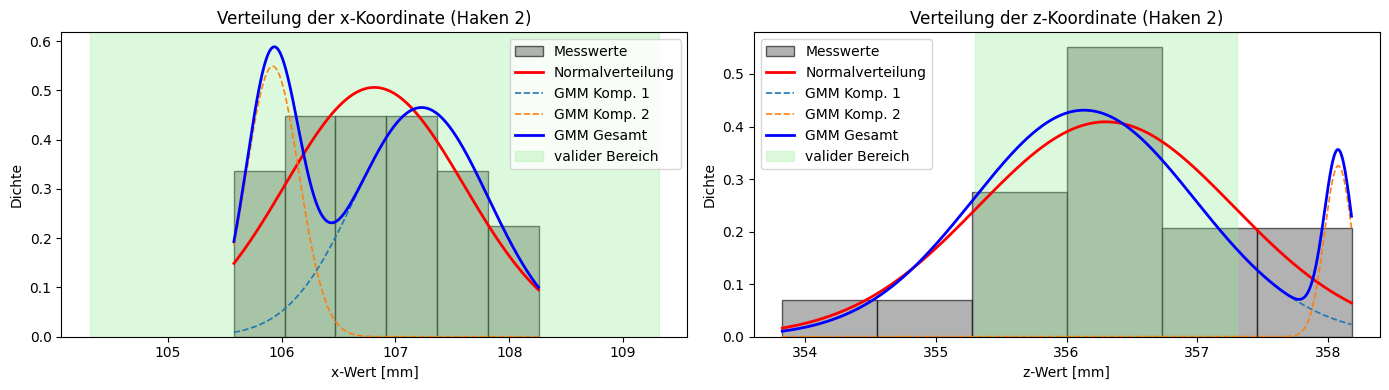

x-Achse: μ-Komponenten = [107.23 105.92], σ-Komponenten = [0.59 0.23], Gewichte = [0.68 0.32]
Zielbereich (angepasst): [104.32, 109.32] → Wahrscheinlichkeit = 99.99 %

z-Achse: μ-Komponenten = [356.13 358.08], σ-Komponenten = [0.85 0.11], Gewichte = [0.91 0.09]
Zielbereich (angepasst): [355.30, 357.30] → Wahrscheinlichkeit = 68.90 %

Gesamte Wahrscheinlichkeit, dass die **ganze Hakenspitze** im Slot liegt (GMM): 68.89 %

---------------------------------------------------------------------------------------------------------
Daten für Haken  3


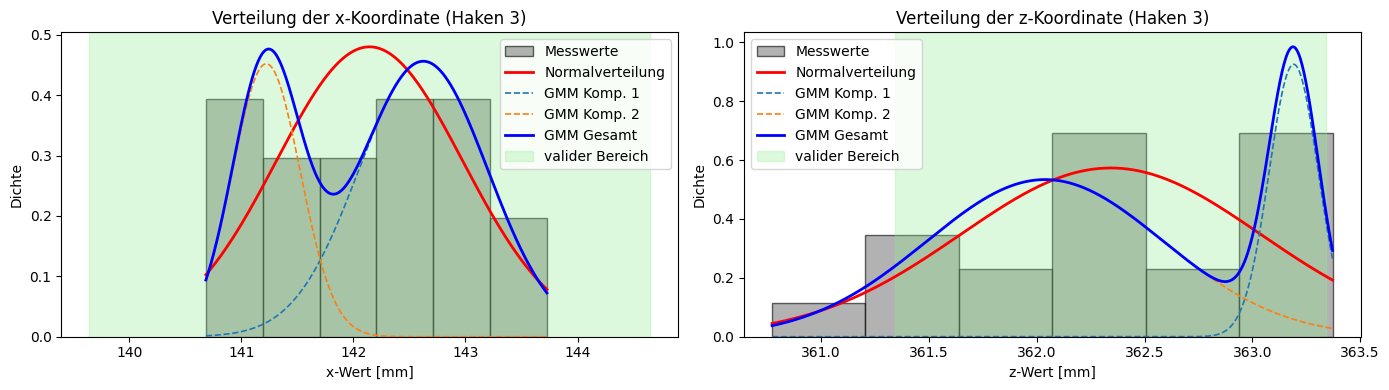

x-Achse: μ-Komponenten = [142.62 141.22], σ-Komponenten = [0.57 0.3 ], Gewichte = [0.66 0.34]
Zielbereich (angepasst): [139.64, 144.64] → Wahrscheinlichkeit = 99.99 %

z-Achse: μ-Komponenten = [363.19 362.04], σ-Komponenten = [0.11 0.55], Gewichte = [0.26 0.74]
Zielbereich (angepasst): [361.34, 363.34] → Wahrscheinlichkeit = 89.36 %

Gesamte Wahrscheinlichkeit, dass die **ganze Hakenspitze** im Slot liegt (GMM): 89.34 %

---------------------------------------------------------------------------------------------------------
Daten für Haken  4


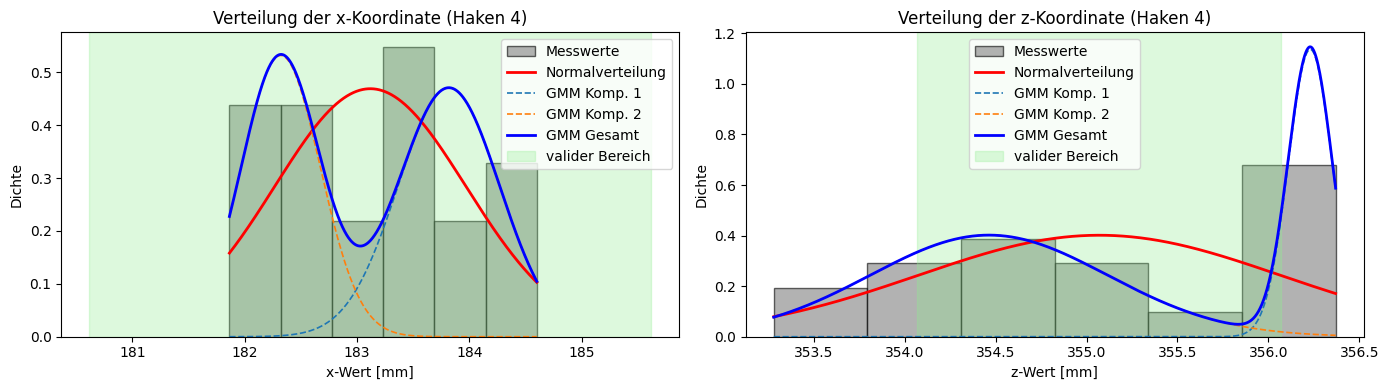

x-Achse: μ-Komponenten = [183.82 182.32], σ-Komponenten = [0.45 0.35], Gewichte = [0.53 0.47]
Zielbereich (angepasst): [180.62, 185.62] → Wahrscheinlichkeit = 100.00 %

z-Achse: μ-Komponenten = [356.23 354.46], σ-Komponenten = [0.12 0.65], Gewichte = [0.34 0.66]
Zielbereich (angepasst): [354.07, 356.07] → Wahrscheinlichkeit = 50.45 %

Gesamte Wahrscheinlichkeit, dass die **ganze Hakenspitze** im Slot liegt (GMM): 50.45 %

---------------------------------------------------------------------------------------------------------
Daten für Haken  5


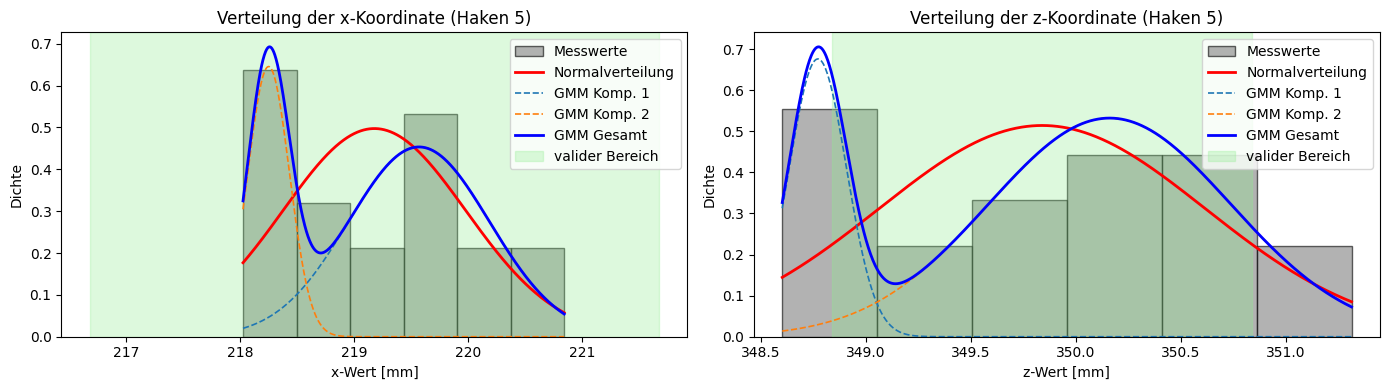

x-Achse: μ-Komponenten = [219.57 218.25], σ-Komponenten = [0.62 0.18], Gewichte = [0.7 0.3]
Zielbereich (angepasst): [216.68, 221.68] → Wahrscheinlichkeit = 99.98 %

z-Achse: μ-Komponenten = [348.77 350.16], σ-Komponenten = [0.14 0.58], Gewichte = [0.23 0.77]
Zielbereich (angepasst): [348.84, 350.84] → Wahrscheinlichkeit = 74.05 %

Gesamte Wahrscheinlichkeit, dass die **ganze Hakenspitze** im Slot liegt (GMM): 74.03 %

---------------------------------------------------------------------------------------------------------
Daten für Haken  6


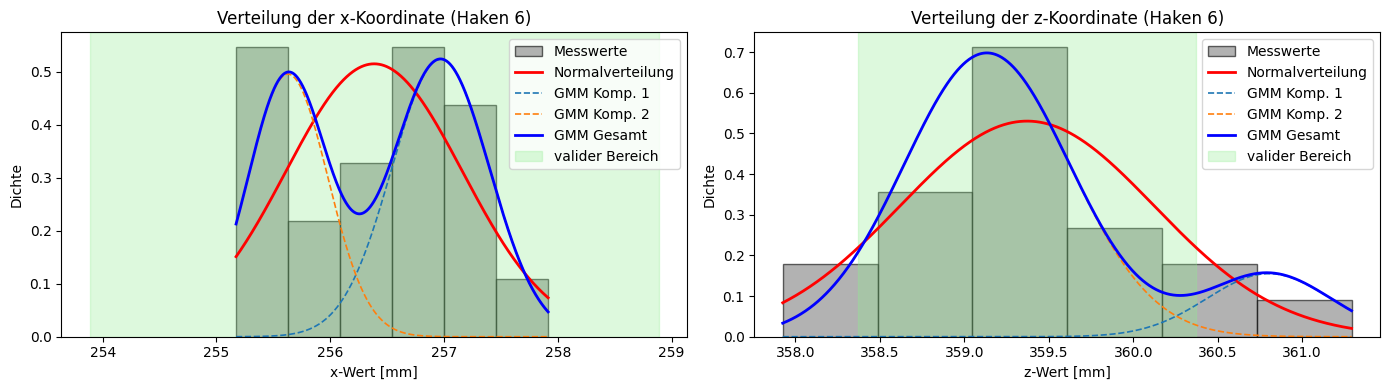

x-Achse: μ-Komponenten = [256.97 255.63], σ-Komponenten = [0.43 0.35], Gewichte = [0.56 0.44]
Zielbereich (angepasst): [253.89, 258.89] → Wahrscheinlichkeit = 100.00 %

z-Achse: μ-Komponenten = [360.8  359.13], σ-Komponenten = [0.37 0.49], Gewichte = [0.14 0.86]
Zielbereich (angepasst): [358.37, 360.37] → Wahrscheinlichkeit = 81.79 %

Gesamte Wahrscheinlichkeit, dass die **ganze Hakenspitze** im Slot liegt (GMM): 81.79 %

---------------------------------------------------------------------------------------------------------
Daten für Haken  7


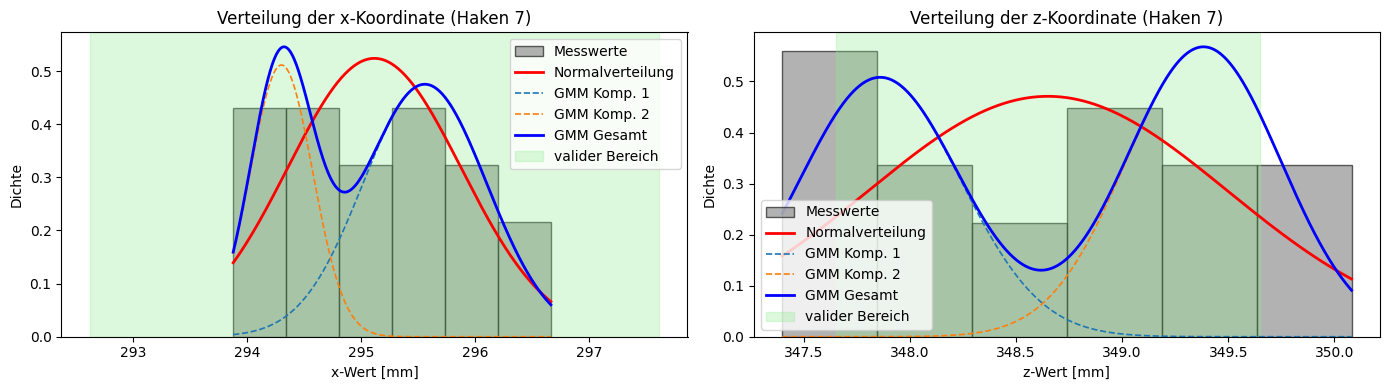

x-Achse: μ-Komponenten = [295.56 294.3 ], σ-Komponenten = [0.54 0.27], Gewichte = [0.65 0.35]
Zielbereich (angepasst): [292.62, 297.62] → Wahrscheinlichkeit = 99.99 %

z-Achse: μ-Komponenten = [347.86 349.38], σ-Komponenten = [0.38 0.36], Gewichte = [0.48 0.52]
Zielbereich (angepasst): [347.65, 349.65] → Wahrscheinlichkeit = 73.99 %

Gesamte Wahrscheinlichkeit, dass die **ganze Hakenspitze** im Slot liegt (GMM): 73.99 %

---------------------------------------------------------------------------------------------------------
Daten für Haken  8


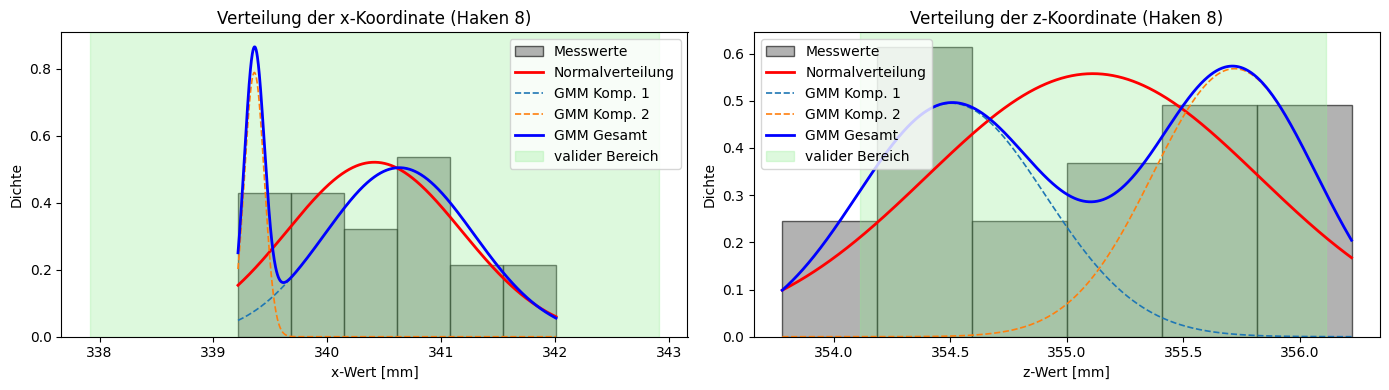

x-Achse: μ-Komponenten = [340.63 339.36], σ-Komponenten = [0.66 0.09], Gewichte = [0.83 0.17]
Zielbereich (angepasst): [337.91, 342.91] → Wahrscheinlichkeit = 99.98 %

z-Achse: μ-Komponenten = [354.5  355.72], σ-Komponenten = [0.4  0.35], Gewichte = [0.5 0.5]
Zielbereich (angepasst): [354.11, 356.11] → Wahrscheinlichkeit = 85.15 %

Gesamte Wahrscheinlichkeit, dass die **ganze Hakenspitze** im Slot liegt (GMM): 85.13 %

---------------------------------------------------------------------------------------------------------
Daten für Haken  9


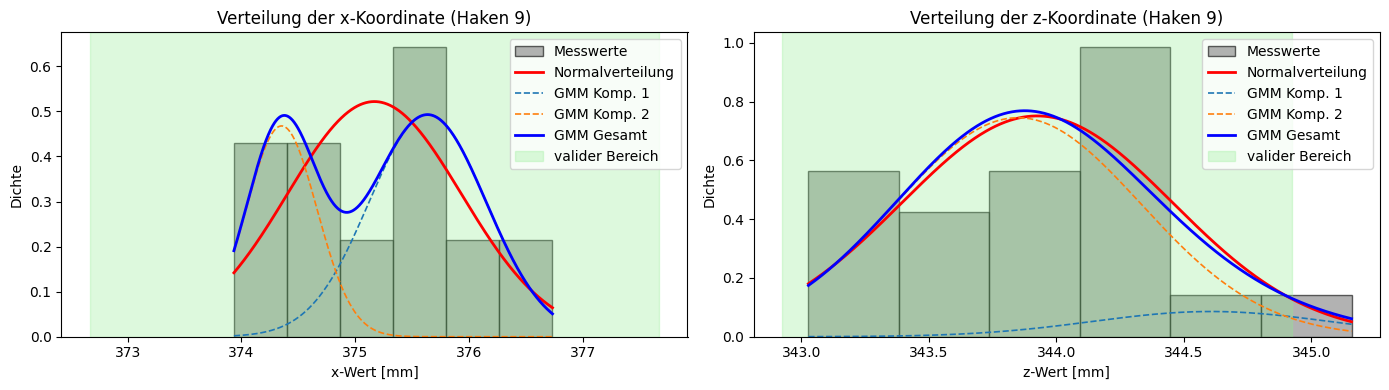

x-Achse: μ-Komponenten = [375.63 374.35], σ-Komponenten = [0.51 0.31], Gewichte = [0.64 0.36]
Zielbereich (angepasst): [372.67, 377.67] → Wahrscheinlichkeit = 100.00 %

z-Achse: μ-Komponenten = [344.61 343.85], σ-Komponenten = [0.46 0.48], Gewichte = [0.1 0.9]
Zielbereich (angepasst): [342.93, 344.93] → Wahrscheinlichkeit = 93.90 %

Gesamte Wahrscheinlichkeit, dass die **ganze Hakenspitze** im Slot liegt (GMM): 93.90 %

---------------------------------------------------------------------------------------------------------
Daten für Haken  10


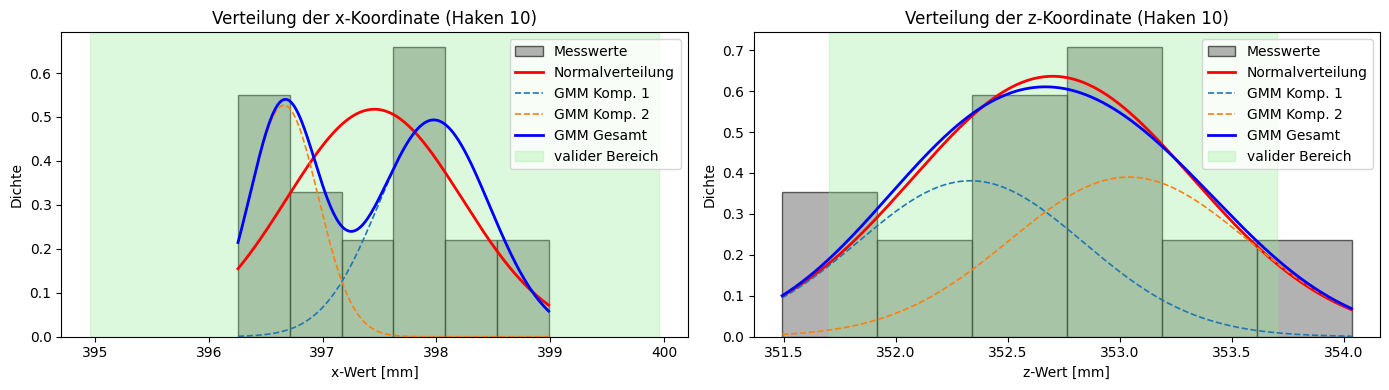

x-Achse: μ-Komponenten = [397.98 396.66], σ-Komponenten = [0.49 0.3 ], Gewichte = [0.6 0.4]
Zielbereich (angepasst): [394.96, 399.96] → Wahrscheinlichkeit = 100.00 %

z-Achse: μ-Komponenten = [352.33 353.04], σ-Komponenten = [0.5  0.53], Gewichte = [0.48 0.52]
Zielbereich (angepasst): [351.70, 353.70] → Wahrscheinlichkeit = 88.96 %

Gesamte Wahrscheinlichkeit, dass die **ganze Hakenspitze** im Slot liegt (GMM): 88.96 %

---------------------------------------------------------------------------------------------------------
Daten für Haken  11


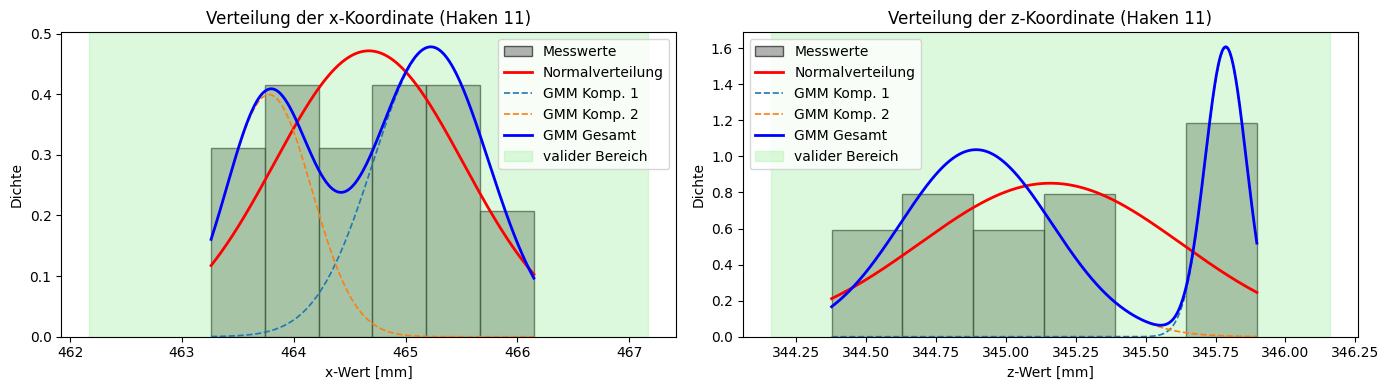

x-Achse: μ-Komponenten = [465.23 463.78], σ-Komponenten = [0.51 0.38], Gewichte = [0.62 0.38]
Zielbereich (angepasst): [462.17, 467.17] → Wahrscheinlichkeit = 99.99 %

z-Achse: μ-Komponenten = [345.79 344.89], σ-Komponenten = [0.07 0.27], Gewichte = [0.3 0.7]
Zielbereich (angepasst): [344.16, 346.16] → Wahrscheinlichkeit = 99.77 %

Gesamte Wahrscheinlichkeit, dass die **ganze Hakenspitze** im Slot liegt (GMM): 99.76 %

---------------------------------------------------------------------------------------------------------
Daten für Haken  12


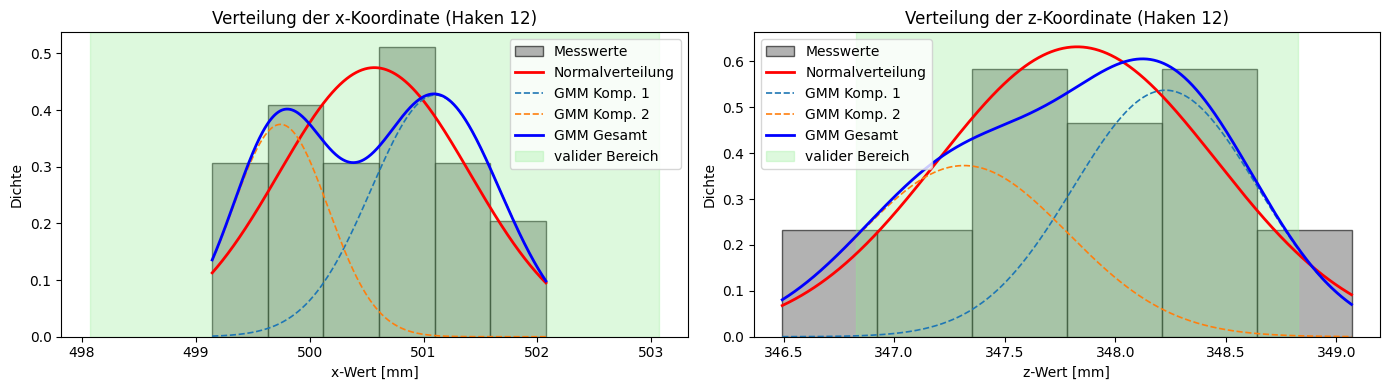

x-Achse: μ-Komponenten = [501.1  499.74], σ-Komponenten = [0.57 0.42], Gewichte = [0.61 0.39]
Zielbereich (angepasst): [498.07, 503.07] → Wahrscheinlichkeit = 99.98 %

z-Achse: μ-Komponenten = [348.23 347.32], σ-Komponenten = [0.42 0.47], Gewichte = [0.56 0.44]
Zielbereich (angepasst): [346.83, 348.83] → Wahrscheinlichkeit = 89.20 %

Gesamte Wahrscheinlichkeit, dass die **ganze Hakenspitze** im Slot liegt (GMM): 89.19 %

---------------------------------------------------------------------------------------------------------
Daten für Haken  13


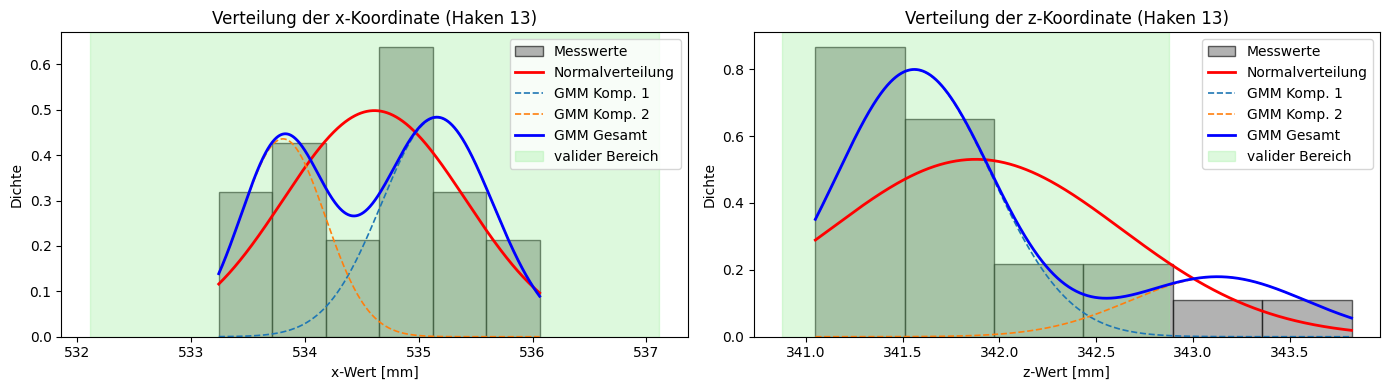

x-Achse: μ-Komponenten = [535.16 533.81], σ-Komponenten = [0.49 0.37], Gewichte = [0.59 0.41]
Zielbereich (angepasst): [532.11, 537.11] → Wahrscheinlichkeit = 100.00 %

z-Achse: μ-Komponenten = [341.56 343.13], σ-Komponenten = [0.4  0.45], Gewichte = [0.8 0.2]
Zielbereich (angepasst): [340.88, 342.88] → Wahrscheinlichkeit = 82.08 %

Gesamte Wahrscheinlichkeit, dass die **ganze Hakenspitze** im Slot liegt (GMM): 82.08 %

---------------------------------------------------------------------------------------------------------
Daten für Haken  14


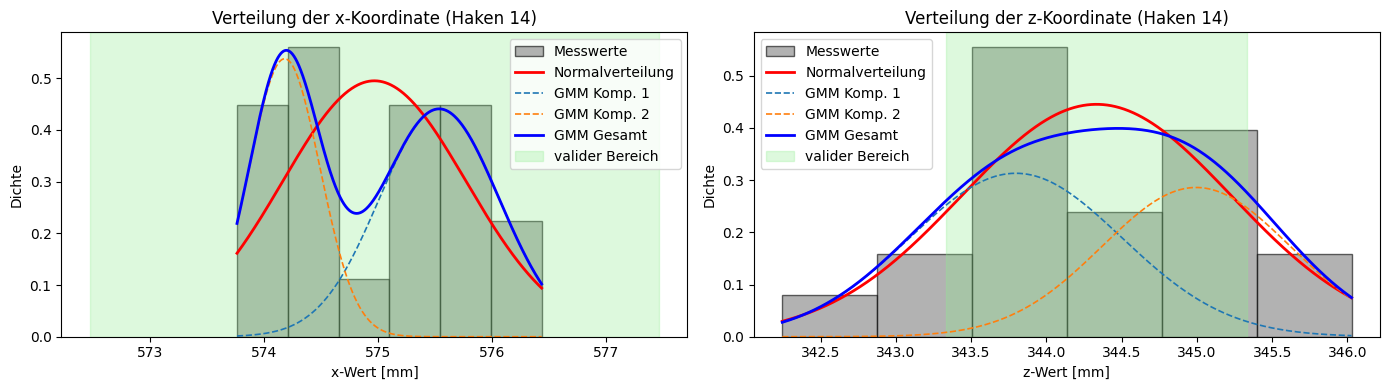

x-Achse: μ-Komponenten = [575.54 574.18], σ-Komponenten = [0.53 0.31], Gewichte = [0.58 0.42]
Zielbereich (angepasst): [572.47, 577.47] → Wahrscheinlichkeit = 99.99 %

z-Achse: μ-Komponenten = [343.8  344.99], σ-Komponenten = [0.7  0.62], Gewichte = [0.55 0.45]
Zielbereich (angepasst): [343.33, 345.33] → Wahrscheinlichkeit = 71.78 %

Gesamte Wahrscheinlichkeit, dass die **ganze Hakenspitze** im Slot liegt (GMM): 71.77 %

---------------------------------------------------------------------------------------------------------
Daten für Haken  15


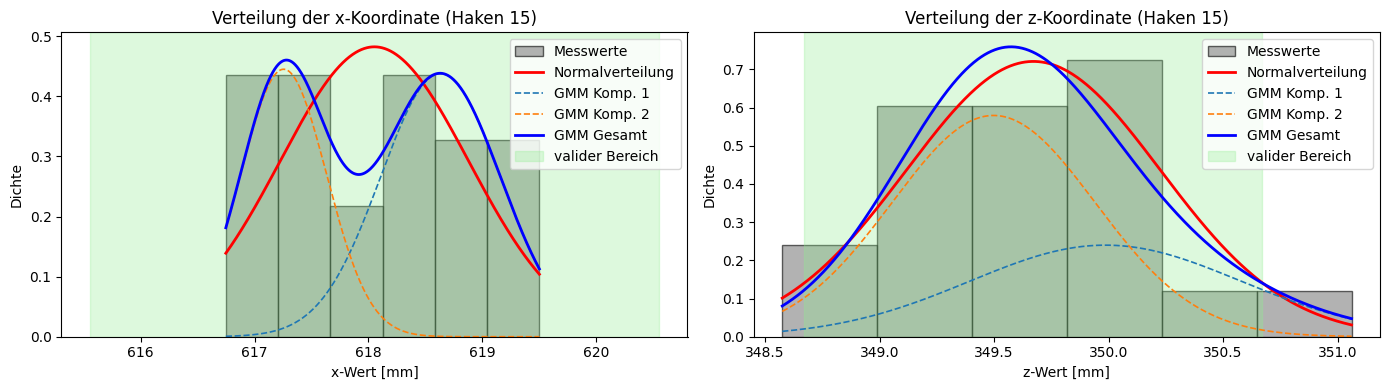

x-Achse: μ-Komponenten = [618.63 617.25], σ-Komponenten = [0.53 0.38], Gewichte = [0.58 0.42]
Zielbereich (angepasst): [615.55, 620.55] → Wahrscheinlichkeit = 99.99 %

z-Achse: μ-Komponenten = [349.99 349.5 ], σ-Komponenten = [0.59 0.44], Gewichte = [0.36 0.64]
Zielbereich (angepasst): [348.67, 350.67] → Wahrscheinlichkeit = 92.85 %

Gesamte Wahrscheinlichkeit, dass die **ganze Hakenspitze** im Slot liegt (GMM): 92.85 %

---------------------------------------------------------------------------------------------------------
Daten für Haken  16


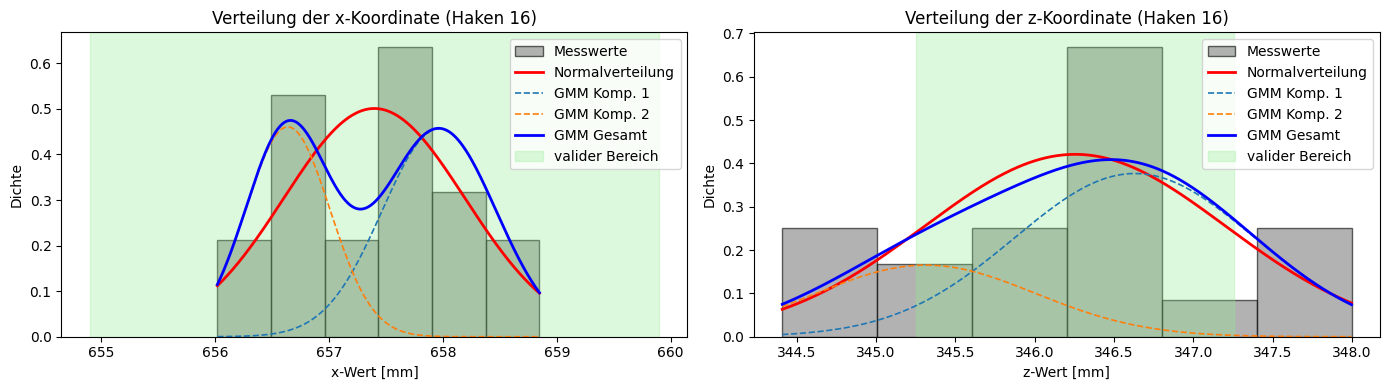

x-Achse: μ-Komponenten = [657.97 656.64], σ-Komponenten = [0.5  0.37], Gewichte = [0.57 0.43]
Zielbereich (angepasst): [654.90, 659.90] → Wahrscheinlichkeit = 100.00 %

z-Achse: μ-Komponenten = [346.63 345.31], σ-Komponenten = [0.76 0.69], Gewichte = [0.71 0.29]
Zielbereich (angepasst): [345.26, 347.26] → Wahrscheinlichkeit = 69.53 %

Gesamte Wahrscheinlichkeit, dass die **ganze Hakenspitze** im Slot liegt (GMM): 69.53 %

---------------------------------------------------------------------------------------------------------
Daten für Haken  17


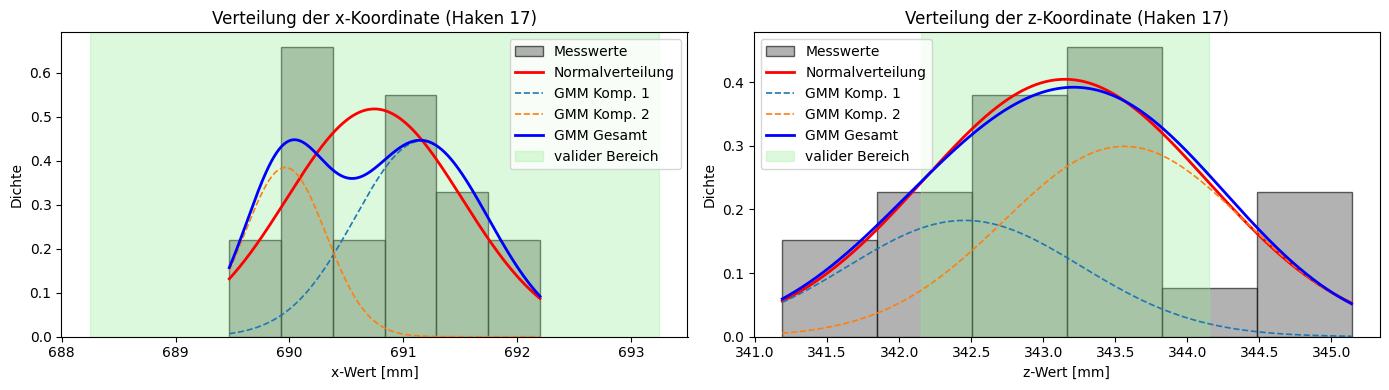

x-Achse: μ-Komponenten = [691.16 689.96], σ-Komponenten = [0.59 0.36], Gewichte = [0.65 0.35]
Zielbereich (angepasst): [688.25, 693.25] → Wahrscheinlichkeit = 99.99 %

z-Achse: μ-Komponenten = [342.45 343.56], σ-Komponenten = [0.81 0.84], Gewichte = [0.37 0.63]
Zielbereich (angepasst): [342.15, 344.15] → Wahrscheinlichkeit = 68.08 %

Gesamte Wahrscheinlichkeit, dass die **ganze Hakenspitze** im Slot liegt (GMM): 68.07 %

---------------------------------------------------------------------------------------------------------
Daten für Haken  18


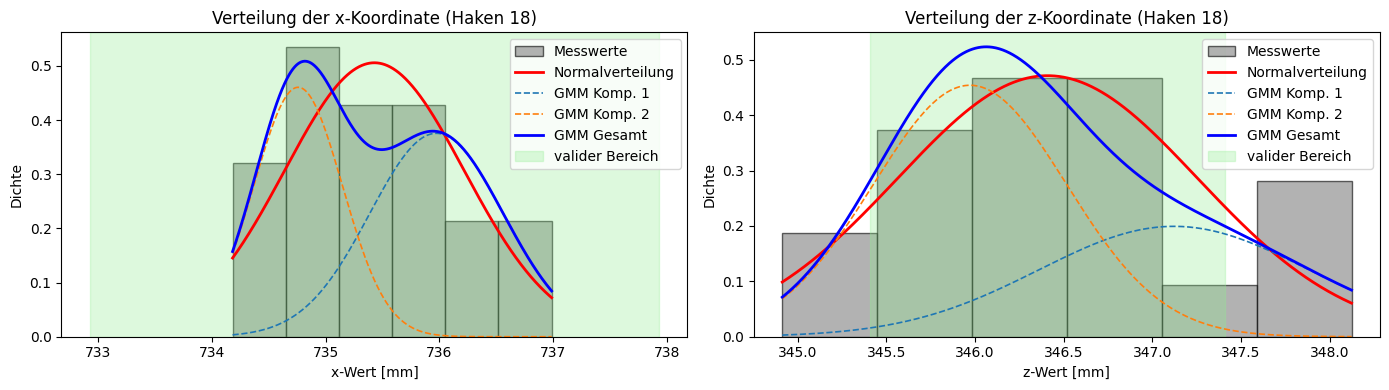

x-Achse: μ-Komponenten = [735.97 734.76], σ-Komponenten = [0.59 0.39], Gewichte = [0.55 0.45]
Zielbereich (angepasst): [732.93, 737.93] → Wahrscheinlichkeit = 99.98 %

z-Achse: μ-Komponenten = [347.12 345.97], σ-Komponenten = [0.76 0.54], Gewichte = [0.38 0.62]
Zielbereich (angepasst): [345.41, 347.41] → Wahrscheinlichkeit = 76.51 %

Gesamte Wahrscheinlichkeit, dass die **ganze Hakenspitze** im Slot liegt (GMM): 76.49 %

---------------------------------------------------------------------------------------------------------
Daten für Haken  19


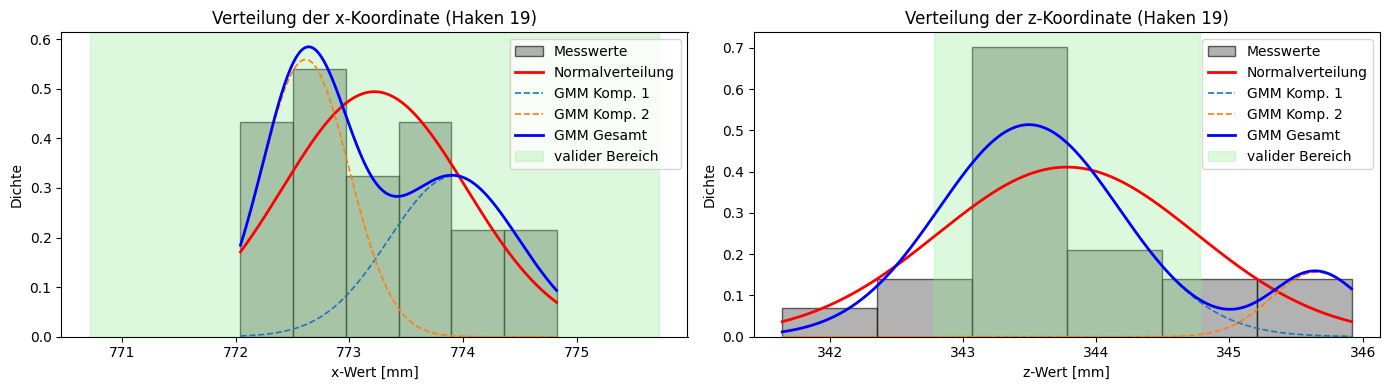

x-Achse: μ-Komponenten = [773.92 772.61], σ-Komponenten = [0.57 0.38], Gewichte = [0.46 0.54]
Zielbereich (angepasst): [770.72, 775.72] → Wahrscheinlichkeit = 99.96 %

z-Achse: μ-Komponenten = [343.5  345.65], σ-Komponenten = [0.67 0.34], Gewichte = [0.87 0.13]
Zielbereich (angepasst): [342.78, 344.78] → Wahrscheinlichkeit = 71.87 %

Gesamte Wahrscheinlichkeit, dass die **ganze Hakenspitze** im Slot liegt (GMM): 71.85 %

---------------------------------------------------------------------------------------------------------
Daten für Haken  20


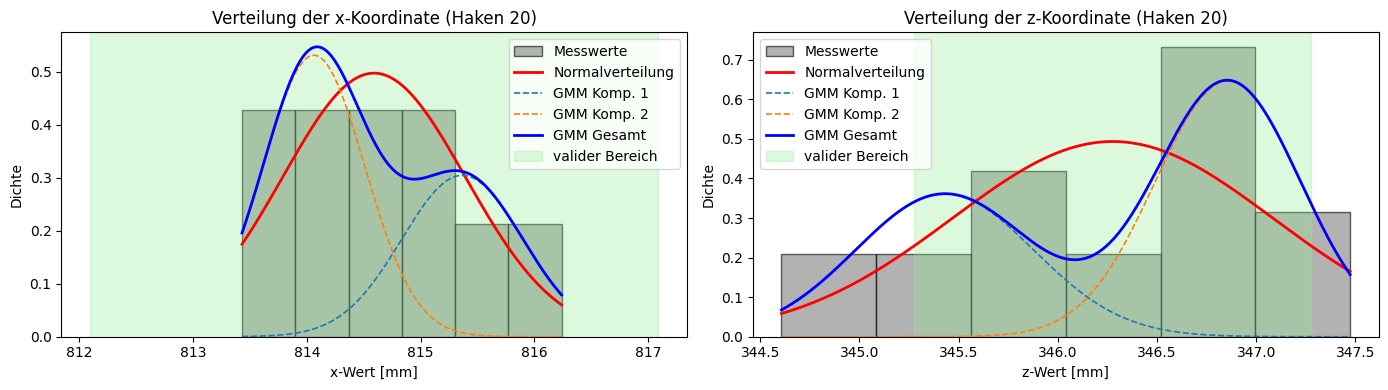

x-Achse: μ-Komponenten = [815.37 814.06], σ-Komponenten = [0.53 0.45], Gewichte = [0.41 0.59]
Zielbereich (angepasst): [812.09, 817.09] → Wahrscheinlichkeit = 99.98 %

z-Achse: μ-Komponenten = [345.43 346.86], σ-Komponenten = [0.45 0.37], Gewichte = [0.41 0.59]
Zielbereich (angepasst): [345.28, 347.28] → Wahrscheinlichkeit = 77.59 %

Gesamte Wahrscheinlichkeit, dass die **ganze Hakenspitze** im Slot liegt (GMM): 77.57 %

---------------------------------------------------------------------------------------------------------
Daten für Haken  21


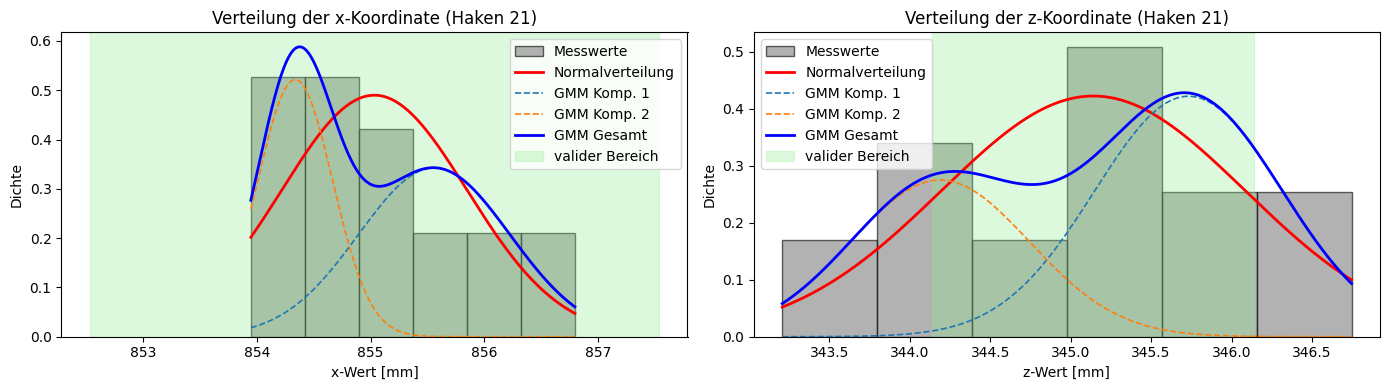

x-Achse: μ-Komponenten = [855.56 854.34], σ-Komponenten = [0.66 0.33], Gewichte = [0.57 0.43]
Zielbereich (angepasst): [852.53, 857.53] → Wahrscheinlichkeit = 99.92 %

z-Achse: μ-Komponenten = [345.73 344.19], σ-Komponenten = [0.58 0.56], Gewichte = [0.62 0.38]
Zielbereich (angepasst): [344.14, 346.14] → Wahrscheinlichkeit = 67.00 %

Gesamte Wahrscheinlichkeit, dass die **ganze Hakenspitze** im Slot liegt (GMM): 66.94 %

---------------------------------------------------------------------------------------------------------
Daten für Haken  22


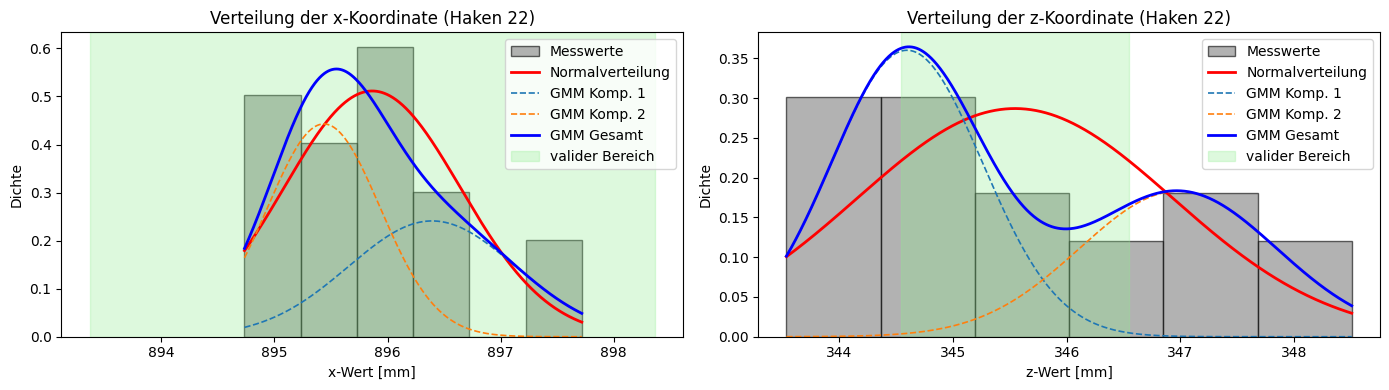

x-Achse: μ-Komponenten = [896.39 895.44], σ-Komponenten = [0.74 0.5 ], Gewichte = [0.45 0.55]
Zielbereich (angepasst): [893.36, 898.36] → Wahrscheinlichkeit = 99.83 %

z-Achse: μ-Komponenten = [344.59 346.98], σ-Komponenten = [0.67 0.87], Gewichte = [0.6 0.4]
Zielbereich (angepasst): [344.55, 346.55] → Wahrscheinlichkeit = 43.93 %

Gesamte Wahrscheinlichkeit, dass die **ganze Hakenspitze** im Slot liegt (GMM): 43.85 %

---------------------------------------------------------------------------------------------------------
Daten für Haken  23


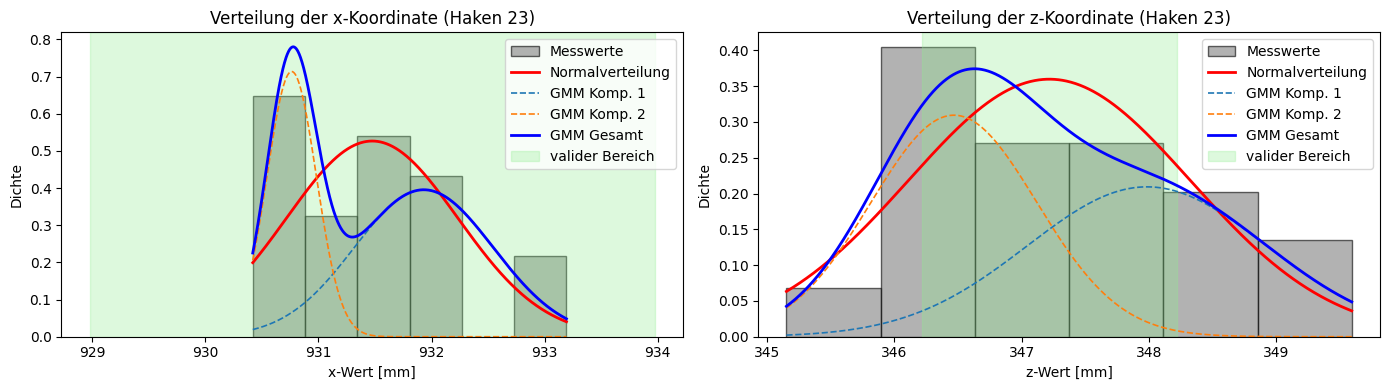

x-Achse: μ-Komponenten = [931.93 930.76], σ-Komponenten = [0.62 0.22], Gewichte = [0.61 0.39]
Zielbereich (angepasst): [928.98, 933.98] → Wahrscheinlichkeit = 99.97 %

z-Achse: μ-Komponenten = [347.99 346.47], σ-Komponenten = [0.94 0.65], Gewichte = [0.49 0.51]
Zielbereich (angepasst): [346.22, 348.22] → Wahrscheinlichkeit = 60.66 %

Gesamte Wahrscheinlichkeit, dass die **ganze Hakenspitze** im Slot liegt (GMM): 60.64 %

Durchschnittliche Verteilungs-Mittelwerte - XYZ:  496.80409767632415 None 349.42109778760374
Durchschnittliche Standardabweichungen - XYZ:  0.7954321426583946 None 0.831171720715717


In [126]:
mu_x_mean = 0
mu_y_mean = 0
mu_z_mean = 0

std_x_mean = 0
std_y_mean = 0
std_z_mean = 0

plot_y=False

for hook_num in range(len(dicts_list[0])):
    mu_std_results, probs = plot_prob_and_hist(hook_num+1, dicts_list, plot_y=plot_y)
    
    mu_x_mean += mu_std_results['x'][0]
    if plot_y:
        mu_y_mean += mu_std_results['y'][0]
    mu_z_mean += mu_std_results['z'][0]
    
    std_x_mean += mu_std_results['x'][1]
    if plot_y:
        std_y_mean += mu_std_results['y'][1]
    std_z_mean += mu_std_results['z'][1]

mu_x_mean /= len(dicts_list[0])
if plot_y:
    mu_y_mean /= len(dicts_list[0])
    std_y_mean /= len(dicts_list[0])
else:
    mu_y_mean = None
    std_y_mean = None
mu_z_mean /= len(dicts_list[0])

std_x_mean /= len(dicts_list[0])
std_z_mean /= len(dicts_list[0])

print("Durchschnittliche Verteilungs-Mittelwerte - XYZ: ", mu_x_mean, mu_y_mean, mu_z_mean)
print("Durchschnittliche Standardabweichungen - XYZ: ", std_x_mean, std_y_mean, std_z_mean)

***
## **Geschwindigkeitsvariationen**

**Dicts laden**

In [127]:
dir_path = '/home/mo/Thesis/Evaluation/1_Scan-Prozess/2_Geschwindigkeit'

In [128]:
dicts_list = []

for testrun_folder in sorted(os.listdir(dir_path)):
    testrun_folder_path = os.path.join(dir_path, testrun_folder)

    if os.path.isdir(testrun_folder_path) and testrun_folder.isdigit():
        data = os.listdir(testrun_folder_path)
        csv_data = [f for f in data if f.endswith('.csv')]

        if len(csv_data) == 1:
            csv_path = os.path.join(testrun_folder_path, csv_data[0])
            dicts_list.append(load_csv_to_dict(csv_path))
        else:
            print(f"No CSV file in: {testrun_folder_path}")

print(f"{len(dicts_list)} Dictionaries found...")

7 Dictionaries found...


**Plot erstellen für Koordinaten**

In [129]:
def plot_speed_values(dicts_list=None, speed_values=None):
    """
    Plottet die x, y, z-Werte für jeden Haken-Tip und -Lowpoint in einem 2x3 Plot.
    Links: Tip-Koordinaten (x, y, z)
    Rechts: Lowpoint-Koordinaten (x, y, z)
    Jeder Punkt wird farblich markiert je nach Ursprung aus dicts_list.
    Die Legende zeigt den Geschwindigkeitswert aus speed_values.
    """
    if dicts_list is None or speed_values is None:
        raise ValueError("dicts_list und speed_values dürfen nicht None sein.")

    if len(dicts_list) != len(speed_values):
        raise ValueError("dicts_list und speed_values müssen gleich lang sein.")

    num_hooks = len(dicts_list[0])
    num_samples = len(dicts_list)

    tips = np.zeros((num_hooks, num_samples, 3))
    lowpoints = np.zeros((num_hooks, num_samples, 3))

    for hook_idx in range(num_hooks):
        dict_key = str(hook_idx + 1)
        for sample_idx, d in enumerate(dicts_list):
            tips[hook_idx, sample_idx] = d[dict_key]['xyz_tip_in_workframe']
            lowpoints[hook_idx, sample_idx] = d[dict_key]['xyz_lowpoint_in_workframe']

    cmap = cm.get_cmap('viridis', num_samples)
    colors = [cmap(i) for i in range(num_samples)]

    fig, axs = plt.subplots(3, 2, figsize=(12, 8))
    fig.suptitle('Koordinaten bei Variation der translatorischen Geschwindigkeit', fontsize=16)
    coord_labels = ['x', 'y', 'z']

    legend_lines = []
    legend_labels = []

    for i in range(3):
        for sample_idx in range(num_samples):
            speed = speed_values[sample_idx]

            # Plot Tip
            line1, = axs[i, 0].plot(
                np.arange(1, num_hooks + 1),
                tips[:, sample_idx, i],
                'o-', color=colors[sample_idx], alpha=0.6
            )

            # Plot Lowpoint
            axs[i, 1].plot(
                np.arange(1, num_hooks + 1),
                lowpoints[:, sample_idx, i],
                'o-', color=colors[sample_idx], alpha=0.6
            )

            if i == 0:
                legend_lines.append(line1)
                legend_labels.append(f'v = {speed}')

        axs[i, 0].set_ylabel(f'Spitze {coord_labels[i]} [mm]')
        axs[i, 1].set_ylabel(f'Senke {coord_labels[i]} [mm]')
        axs[i, 0].grid()
        axs[i, 1].grid()
        axs[i, 0].set_xlabel('Haken-Instanz')
        axs[i, 1].set_xlabel('Haken-Instanz')

    axs[0, 0].set_title('Spitze')
    axs[0, 1].set_title('Senke')

    # Kompaktere, rechts platzierte Legende
    fig.legend(
        legend_lines, legend_labels,
        loc='center left',
        bbox_to_anchor=(0.97, 0.5),
        title='Geschwindigkeit [mm/s]',
        labelspacing=0.3,  # Weniger Abstand zwischen Labels
        handlelength=2.0,  # Kürzere Linien
        borderaxespad=0.5,
        fontsize='small'
    )

    plt.tight_layout(rect=[0, 0.03, 0.92, 0.95])  # Mehr Platz für Plot, weniger für Legende
    plt.show()

/tmp/ipykernel_5344/2306161238.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', num_samples)


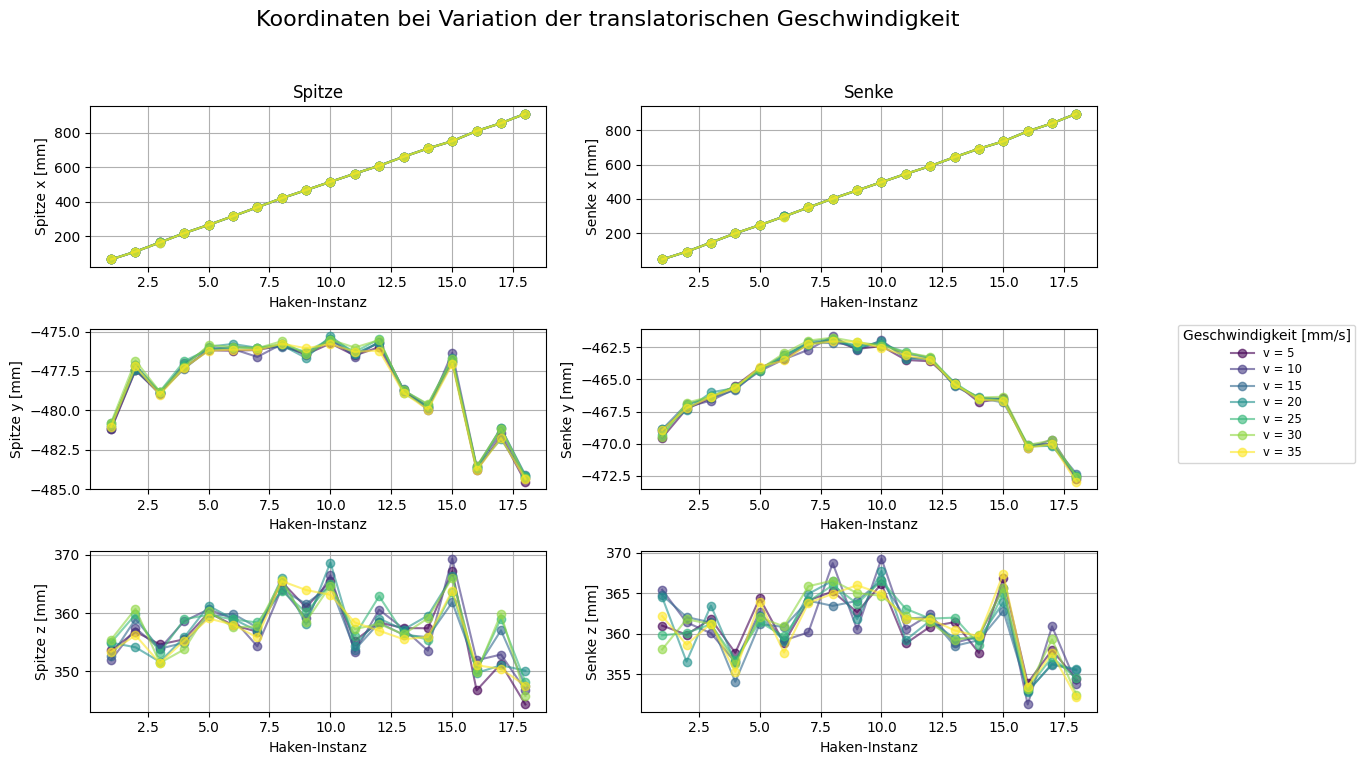

In [130]:
plot_speed_values(dicts_list, [5, 10, 15, 20, 25, 30, 35])

**Mittelwert berechnen**

In [131]:
mean_xyz_tip_in_workframe, mean_xyz_lowpoint_in_workframe = calculate_mean(dicts_list)
print("Mittlere Abweichung Spitze - ", mean_xyz_tip_in_workframe)
print("Mittlere Abweichung Senke - ", mean_xyz_lowpoint_in_workframe)

Mittlere Abweichung Spitze -  [array([  65.3492921 , -480.99834551,  353.81072071]), array([ 110.42183072, -477.23837282,  357.70437321]), array([ 163.47692755, -478.89166478,  352.84190424]), array([ 217.94147692, -477.16918651,  356.10090735]), array([ 265.68748467, -476.08114844,  360.07426282]), array([ 316.25257729, -476.03241539,  358.61489683]), array([ 368.07552354, -476.16286513,  356.76989523]), array([ 420.51932993, -475.81840466,  364.95576982]), array([ 467.92530638, -476.39785785,  360.33640187]), array([ 515.934943  , -475.54811647,  365.4508725 ]), array([ 563.54385228, -476.36793967,  355.48906841]), array([ 609.53920044, -475.75778795,  359.19247322]), array([ 661.46328684, -478.77772453,  356.63654696]), array([ 710.15818911, -479.7939298 ,  356.67469571]), array([ 752.49619663, -476.78926759,  365.46180041]), array([ 811.41912259, -483.66629174,  349.93014436]), array([ 856.93088648, -481.44733214,  354.49863813]), array([ 911.83527452, -484.27184802,  347.12661568]

**Standardabweichung und Verteilung berechnen**

---------------------------------------------------------------------------------------------------------
Daten für Haken  1


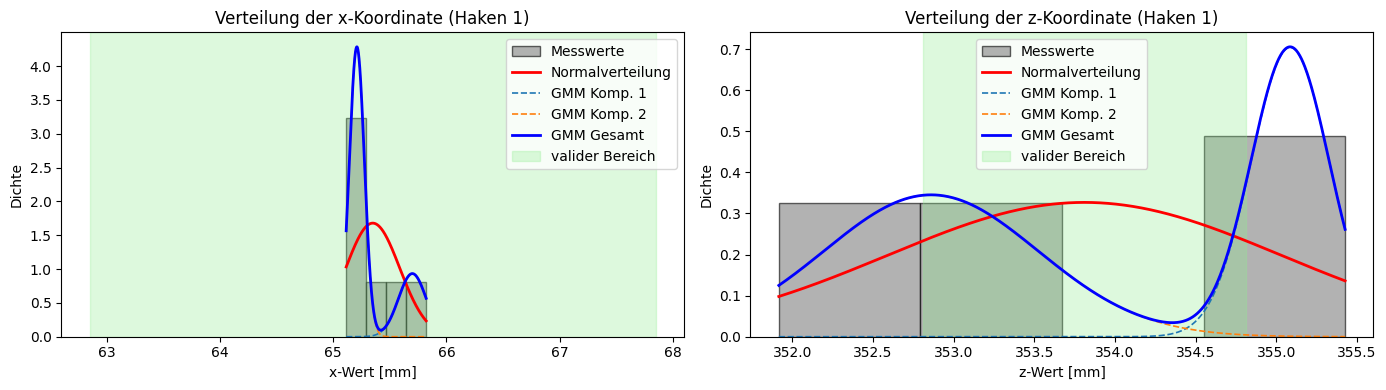

x-Achse: μ-Komponenten = [65.7  65.21], σ-Komponenten = [0.12 0.07], Gewichte = [0.29 0.71]
Zielbereich (angepasst): [62.85, 67.85] → Wahrscheinlichkeit = 100.00 %

z-Achse: μ-Komponenten = [355.09 352.86], σ-Komponenten = [0.24 0.66], Gewichte = [0.43 0.57]
Zielbereich (angepasst): [352.81, 354.81] → Wahrscheinlichkeit = 35.68 %

Gesamte Wahrscheinlichkeit, dass die **ganze Hakenspitze** im Slot liegt (GMM): 35.68 %



KeyError: 'y'

In [132]:
mu_x_mean = 0
mu_y_mean = 0
mu_z_mean = 0

std_x_mean = 0
std_y_mean = 0
std_z_mean = 0

for hook_num in range(len(dicts_list[0])):
    mu_std_results, probs = plot_prob_and_hist(hook_num+1, dicts_list)
    
    mu_x_mean += mu_std_results['x'][0]
    mu_y_mean += mu_std_results['y'][0]
    mu_z_mean += mu_std_results['z'][0]
    
    std_x_mean += mu_std_results['x'][1]
    std_y_mean += mu_std_results['y'][1]
    std_z_mean += mu_std_results['z'][1]

mu_x_mean /= len(dicts_list[0])
mu_y_mean /= len(dicts_list[0])
mu_z_mean /= len(dicts_list[0])

std_x_mean /= len(dicts_list[0])
std_y_mean /= len(dicts_list[0])
std_z_mean /= len(dicts_list[0])

print("Durchschnittliche Verteilungs-Mittelwerte - XYZ: ", mu_x_mean, mu_y_mean, mu_z_mean)
print("Durchschnittliche Standardabweichungen - XYZ: ", std_x_mean, std_y_mean, std_z_mean)

***
## **Triangulationsmethoden**

In [ ]:
horizontal_0_filepath = '/home/mo/Thesis/Evaluation/1_Scan-Prozess/1_Triangulationsmethoden/1_Horizontale-Triangulation/0/global_hook_dict_horizontal.csv'
horizontal_far_filepath = '/home/mo/Thesis/Evaluation/1_Scan-Prozess/1_Triangulationsmethoden/1_Horizontale-Triangulation/-20/global_hook_dict_horizontal.csv'
horizontal_near_filepath = '/home/mo/Thesis/Evaluation/1_Scan-Prozess/1_Triangulationsmethoden/1_Horizontale-Triangulation/20/global_hook_dict_horizontal.csv'

vertical_0_filepath = '/home/mo/Thesis/Evaluation/1_Scan-Prozess/1_Triangulationsmethoden/2_Vertikale-Triangulation/0/global_hook_dict_vertical.csv'
vertical_far_filepath = '/home/mo/Thesis/Evaluation/1_Scan-Prozess/1_Triangulationsmethoden/2_Vertikale-Triangulation/-20/global_hook_dict_vertical.csv'
vertical_near_filepath = '/home/mo/Thesis/Evaluation/1_Scan-Prozess/1_Triangulationsmethoden/2_Vertikale-Triangulation/20/global_hook_dict_vertical.csv'

In [ ]:
horizontal_0_dict = load_csv_to_dict(horizontal_0_filepath)
horizontal_far_dict = load_csv_to_dict(horizontal_far_filepath)
horizontal_near_dict = load_csv_to_dict(horizontal_near_filepath)

vertical_0_dict = load_csv_to_dict(vertical_0_filepath)
vertical_far_dict = load_csv_to_dict(vertical_far_filepath)
vertical_near_dict = load_csv_to_dict(vertical_near_filepath)

print("Dicts in Ordnung!") if len(horizontal_0_dict) == len(horizontal_far_dict) == len(horizontal_near_dict) == len(vertical_0_dict) == len(vertical_far_dict) == len(vertical_near_dict) else print("Ungleiche Längen!")

Dicts in Ordnung!


In [ ]:
def extract_xyz_vals(horizontal_dicts_list, vertical_dicts_list):
    """
    - Extrahiert für jeden Haken die XYZ-Werte für Tip und Lowpoint - für beide Triangulationsmethoden
    - Berechnet die kombinierte Triangulation als Mittelwert beider Ergebnisse
    """
    horizontal_vals = {
        'x_tip_vals': [],
        'y_tip_vals': [],
        'z_tip_vals': [],
        'x_lowpoint_vals': [],
        'y_lowpoint_vals': [],
        'z_lowpoint_vals': []
        }
    vertical_vals = {
        'x_tip_vals': [],
        'y_tip_vals': [],
        'z_tip_vals': [],
        'x_lowpoint_vals': [],
        'y_lowpoint_vals': [],
        'z_lowpoint_vals': []
        }
    combined_vals = {
        'x_tip_vals': [],
        'y_tip_vals': [],
        'z_tip_vals': [],
        'x_lowpoint_vals': [],
        'y_lowpoint_vals': [],
        'z_lowpoint_vals': []
        }

    for hook_idx in range(len(horizontal_dicts_list[0])-2):
        hook_key = str(hook_idx + 1)
        for dict_idx in range(len(horizontal_dicts_list)):
            dict = horizontal_dicts_list[dict_idx]
            xyz_tip_in_camframe = dict[hook_key]['xyz_tip_in_camframe']
            xyz_lowpoint_in_camframe = dict[hook_key]['xyz_lowpoint_in_camframe']
            horizontal_vals['x_tip_vals'].append(xyz_tip_in_camframe[0])
            horizontal_vals['y_tip_vals'].append(xyz_tip_in_camframe[1])
            horizontal_vals['z_tip_vals'].append(xyz_tip_in_camframe[2])
            horizontal_vals['x_lowpoint_vals'].append(xyz_lowpoint_in_camframe[0])
            horizontal_vals['y_lowpoint_vals'].append(xyz_lowpoint_in_camframe[1])
            horizontal_vals['z_lowpoint_vals'].append(xyz_lowpoint_in_camframe[2])
            
        for dict_idx in range(len(vertical_dicts_list)):
            dict = vertical_dicts_list[dict_idx]
            xyz_tip_in_camframe = dict[hook_key]['xyz_tip_in_camframe']
            xyz_lowpoint_in_camframe = dict[hook_key]['xyz_lowpoint_in_camframe']
            vertical_vals['x_tip_vals'].append(xyz_tip_in_camframe[0])
            vertical_vals['y_tip_vals'].append(xyz_tip_in_camframe[1])
            vertical_vals['z_tip_vals'].append(xyz_tip_in_camframe[2])
            vertical_vals['x_lowpoint_vals'].append(xyz_lowpoint_in_camframe[0])
            vertical_vals['y_lowpoint_vals'].append(xyz_lowpoint_in_camframe[1])
            vertical_vals['z_lowpoint_vals'].append(xyz_lowpoint_in_camframe[2])

            combined_vals['x_tip_vals'].append((xyz_tip_in_camframe[0] + horizontal_vals['x_tip_vals'][dict_idx])/2)
            combined_vals['y_tip_vals'].append((xyz_tip_in_camframe[1] + horizontal_vals['y_tip_vals'][dict_idx])/2)
            combined_vals['z_tip_vals'].append((xyz_tip_in_camframe[2] + horizontal_vals['z_tip_vals'][dict_idx])/2)
            combined_vals['x_lowpoint_vals'].append((xyz_tip_in_camframe[0] + horizontal_vals['x_lowpoint_vals'][dict_idx])/2)
            combined_vals['y_lowpoint_vals'].append((xyz_tip_in_camframe[1] + horizontal_vals['y_lowpoint_vals'][dict_idx])/2)
            combined_vals['z_lowpoint_vals'].append((xyz_tip_in_camframe[2] + horizontal_vals['z_lowpoint_vals'][dict_idx])/2)
    return horizontal_vals, vertical_vals, combined_vals

In [ ]:
def plot_xyz_values(horizontal_vals_dict, vertical_vals_dict, combined_vals_dict, to_plot='tip'):
    """
    Erstellt einen 3x3 Plot zur Darstellung der XYZ-Koordinaten für Horizontal, Vertikal, Kombiniert
        -> die Koordinaten sind entweder für Spitze (tip) oder Senke (lowpoint) aufgezeichnet -> steht im Plot-Titel
    """
    
    # Farben und zugehörige Labels im rotierenden Muster
    colors = ['black', 'green', 'red']
    labels = ['mittel', 'nah', 'fern']

    # Auswahl der richtigen Keys basierend auf 'to_plot'
    key_suffix = f"_{to_plot}_vals"

    # Dictionaries der drei Kategorien
    all_data = {
        'Horizontal': horizontal_vals_dict,
        'Vertikal': vertical_vals_dict,
        'Kombiniert': combined_vals_dict
    }

    fig, axes = plt.subplots(3, 3, figsize=(20, 12))
    fig.suptitle(f"XYZ-Koordinaten für {to_plot.capitalize()}", fontsize=16)

    # Achsen-Labels
    axes_labels = ['X', 'Y', 'Z']

    for row_idx, (category, data_dict) in enumerate(all_data.items()):
        for col_idx, axis in enumerate(['x', 'y', 'z']):
            ax = axes[row_idx, col_idx]
            vals = data_dict[f'{axis}{key_suffix}']

            # Punkte und Linien nach Kategorie zeichnen
            plotted_labels = set()
            grouped_vals = {label: [] for label in labels}
            grouped_indices = {label: [] for label in labels}

            for i, val in enumerate(vals):
                color = colors[i % len(colors)]
                label = labels[i % len(labels)]
                grouped_vals[label].append(val)
                grouped_indices[label].append(i)

                if label not in plotted_labels:
                    ax.plot(i, val, 'o', color=color, label=label)
                    plotted_labels.add(label)
                else:
                    ax.plot(i, val, 'o', color=color)

            # Linien für jede Gruppe zeichnen
            for label, color in zip(labels, colors):
                if grouped_indices[label]:
                    ax.plot(grouped_indices[label], grouped_vals[label], linestyle='-', color=color, alpha=0.7)

            ax.set_title(f"{category} - {axes_labels[col_idx]}")
            ax.set_xlabel('Haken-Instanz')
            ax.set_ylabel(f'{axes_labels[col_idx]}-Wert')
            ax.grid()
            ax.legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

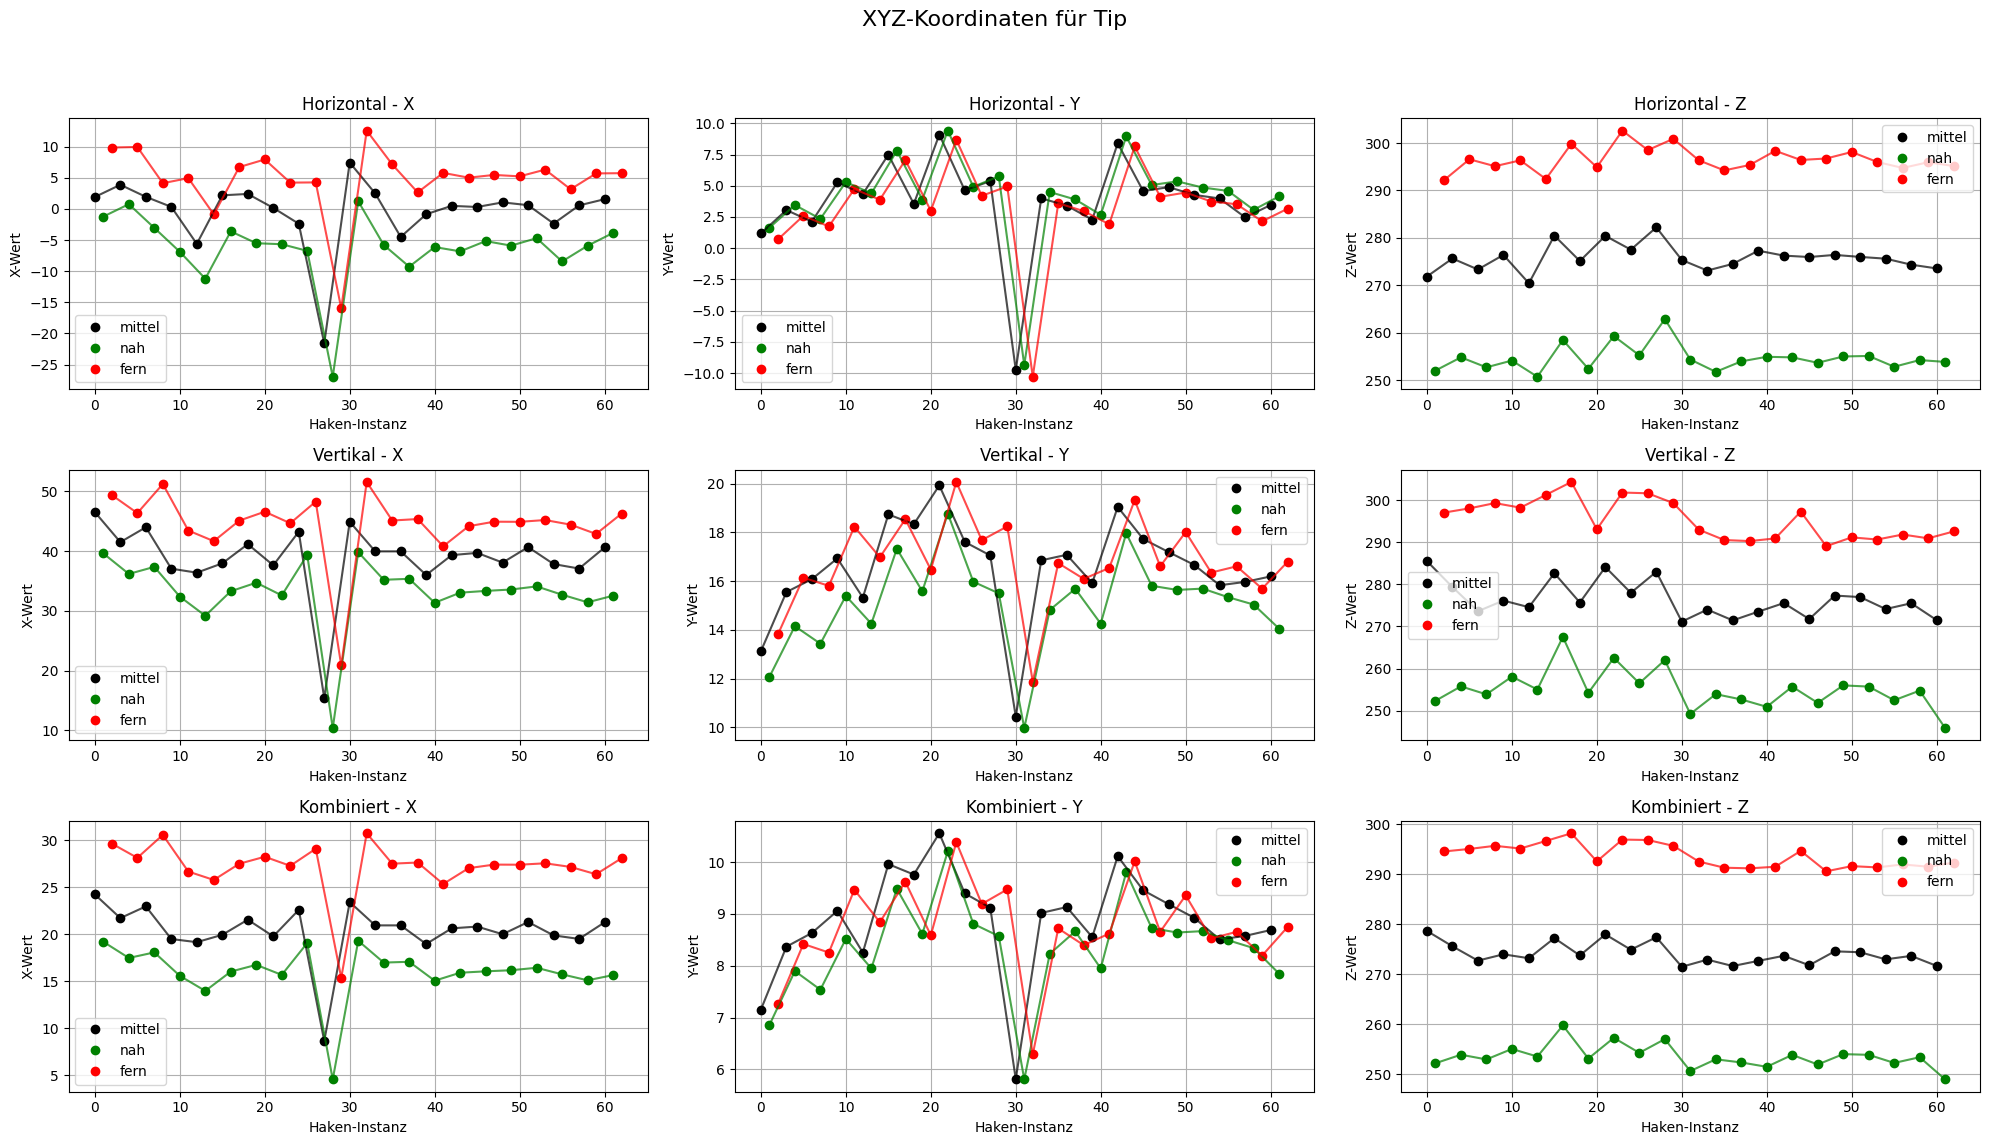

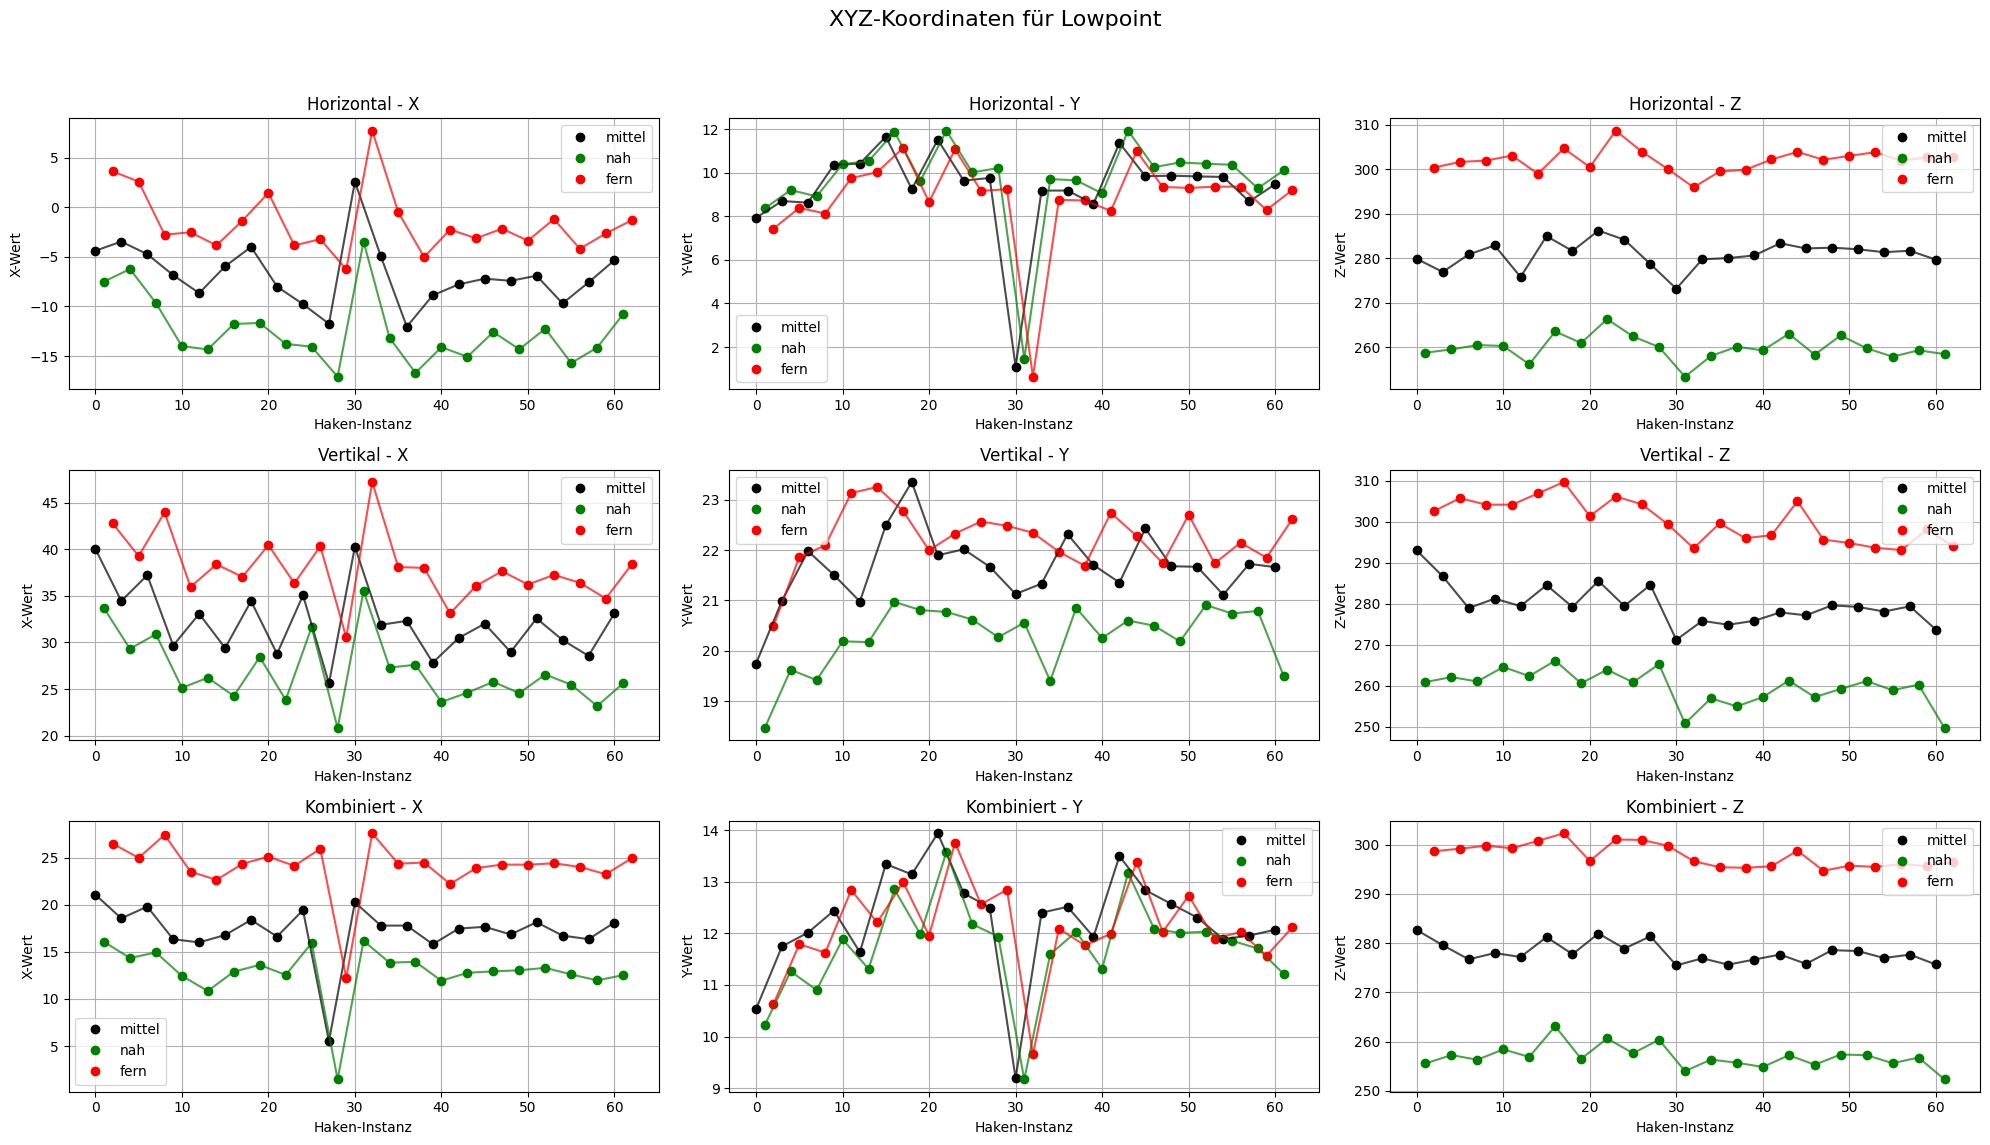

In [ ]:
horizontal_dicts_list = [horizontal_0_dict, horizontal_near_dict, horizontal_far_dict]
vertical_dicts_list = [vertical_0_dict, vertical_near_dict, vertical_far_dict]
horizontal_vals, vertical_vals, combined_vals = extract_xyz_vals(horizontal_dicts_list, vertical_dicts_list)
plot_xyz_values(horizontal_vals, vertical_vals, combined_vals, 'tip')
plot_xyz_values(horizontal_vals, vertical_vals, combined_vals, 'lowpoint')

In [ ]:
def calculate_differences(vals_dict):
    """
    Berechnet die Differenzen zwischen den drei Messreihen für jedes Verfahren
    """
    mean_far_diffs = {
        'x_tip_vals': [],
        'y_tip_vals': [],
        'z_tip_vals': [],
        'x_lowpoint_vals': [],
        'y_lowpoint_vals': [],
        'z_lowpoint_vals': []
    }
    mean_near_diffs = {
        'x_tip_vals': [],
        'y_tip_vals': [],
        'z_tip_vals': [],
        'x_lowpoint_vals': [],
        'y_lowpoint_vals': [],
        'z_lowpoint_vals': []
    }

    for val_idx in range(0, len(vals_dict['x_tip_vals']) - 2, 3):
        mean_near_diffs['x_tip_vals'].append(vals_dict['x_tip_vals'][val_idx] - vals_dict['x_tip_vals'][val_idx+1])
        mean_far_diffs['x_tip_vals'].append(vals_dict['x_tip_vals'][val_idx] - vals_dict['x_tip_vals'][val_idx+2])
        mean_near_diffs['y_tip_vals'].append(vals_dict['y_tip_vals'][val_idx] - vals_dict['y_tip_vals'][val_idx+1])
        mean_far_diffs['y_tip_vals'].append(vals_dict['y_tip_vals'][val_idx] - vals_dict['y_tip_vals'][val_idx+2])
        mean_near_diffs['z_tip_vals'].append(vals_dict['z_tip_vals'][val_idx] - vals_dict['z_tip_vals'][val_idx+1])
        mean_far_diffs['z_tip_vals'].append(vals_dict['z_tip_vals'][val_idx] - vals_dict['z_tip_vals'][val_idx+2])

        mean_near_diffs['x_lowpoint_vals'].append(vals_dict['x_lowpoint_vals'][val_idx] - vals_dict['x_lowpoint_vals'][val_idx+1])
        mean_far_diffs['x_lowpoint_vals'].append(vals_dict['x_lowpoint_vals'][val_idx] - vals_dict['x_lowpoint_vals'][val_idx+2])
        mean_near_diffs['y_lowpoint_vals'].append(vals_dict['y_lowpoint_vals'][val_idx] - vals_dict['y_lowpoint_vals'][val_idx+1])
        mean_far_diffs['y_lowpoint_vals'].append(vals_dict['y_lowpoint_vals'][val_idx] - vals_dict['y_lowpoint_vals'][val_idx+2])
        mean_near_diffs['z_lowpoint_vals'].append(vals_dict['z_lowpoint_vals'][val_idx] - vals_dict['z_lowpoint_vals'][val_idx+1])
        mean_far_diffs['z_lowpoint_vals'].append(vals_dict['z_lowpoint_vals'][val_idx] - vals_dict['z_lowpoint_vals'][val_idx+2])

    return mean_far_diffs, mean_near_diffs

In [ ]:
horizontal_far_diffs, horizontal_near_diffs = calculate_differences(horizontal_vals)
vertical_far_diffs, vertical_near_diffs = calculate_differences(vertical_vals)
combined_far_diffs, combined_near_diffs = calculate_differences(combined_vals)

In [ ]:
def plot_diffs(horizontal_far_diffs, horizontal_near_diffs,
               vertical_far_diffs, vertical_near_diffs,
               combined_far_diffs, combined_near_diffs,
               to_plot='tip'):
    """
    Plottet einen 3x3 Plot für die Differenz-Werte
        -> entweder für Spitze (tip) oder Senke (lowpoint)
    """
    
    colors = {'nah': 'green', 'fern': 'red'}
    
    key_suffix = f"_{to_plot}_vals"

    # Struktur der Daten
    all_data = {
        'Horizontale Triangulation': {'nah': horizontal_near_diffs, 'fern': horizontal_far_diffs},
        'Vertikale Triangulation': {'nah': vertical_near_diffs, 'fern': vertical_far_diffs},
        'Kombinierte Triangulation': {'nah': combined_near_diffs, 'fern': combined_far_diffs},
    }

    fig, axes = plt.subplots(3, 3, figsize=(20, 12))
    fig.suptitle(f"Differenzen für {to_plot.capitalize()}", fontsize=16)

    axes_labels = ['X', 'Y', 'Z']

    for row_idx, (category, sources) in enumerate(all_data.items()):
        for col_idx, axis in enumerate(['x', 'y', 'z']):
            ax = axes[row_idx, col_idx]
            for label, data_dict in sources.items():
                vals = data_dict[f'{axis}{key_suffix}']
                if vals:
                    ax.plot(range(len(vals)), vals, 'o-', color=colors[label], label=label)

            # Zusätzliche Linien für z-Achsen
            if axis == 'z':
                for y in [-20, 0, 20]:
                    ax.axhline(y=y, linestyle='--', color='magenta', linewidth=2, label=f'soll {y}')

            ax.set_title(f"{category} - {axes_labels[col_idx]}")
            ax.set_xlabel('Haken-Instanz')
            ax.set_ylabel(f'Diff {axes_labels[col_idx]}')
            ax.grid()
            ax.legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

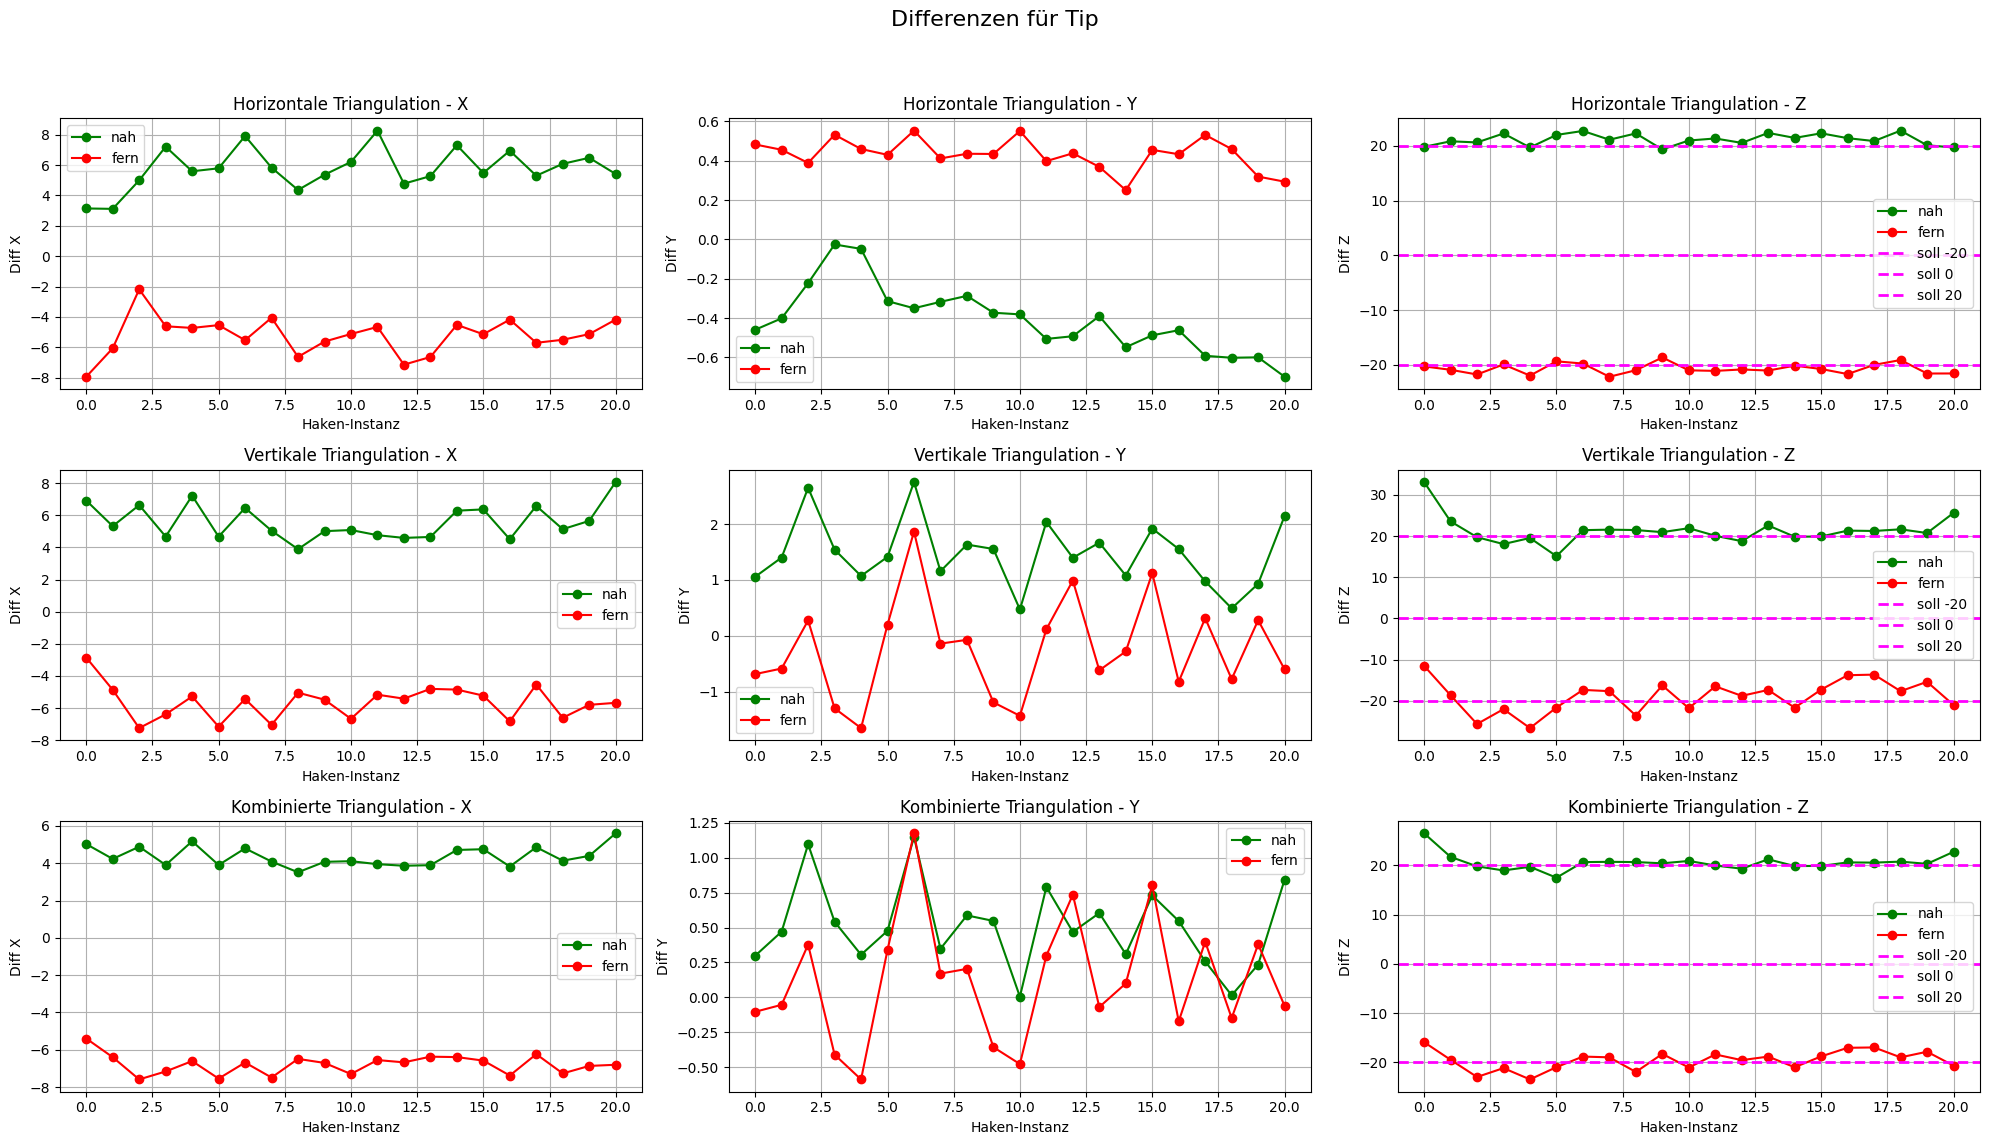

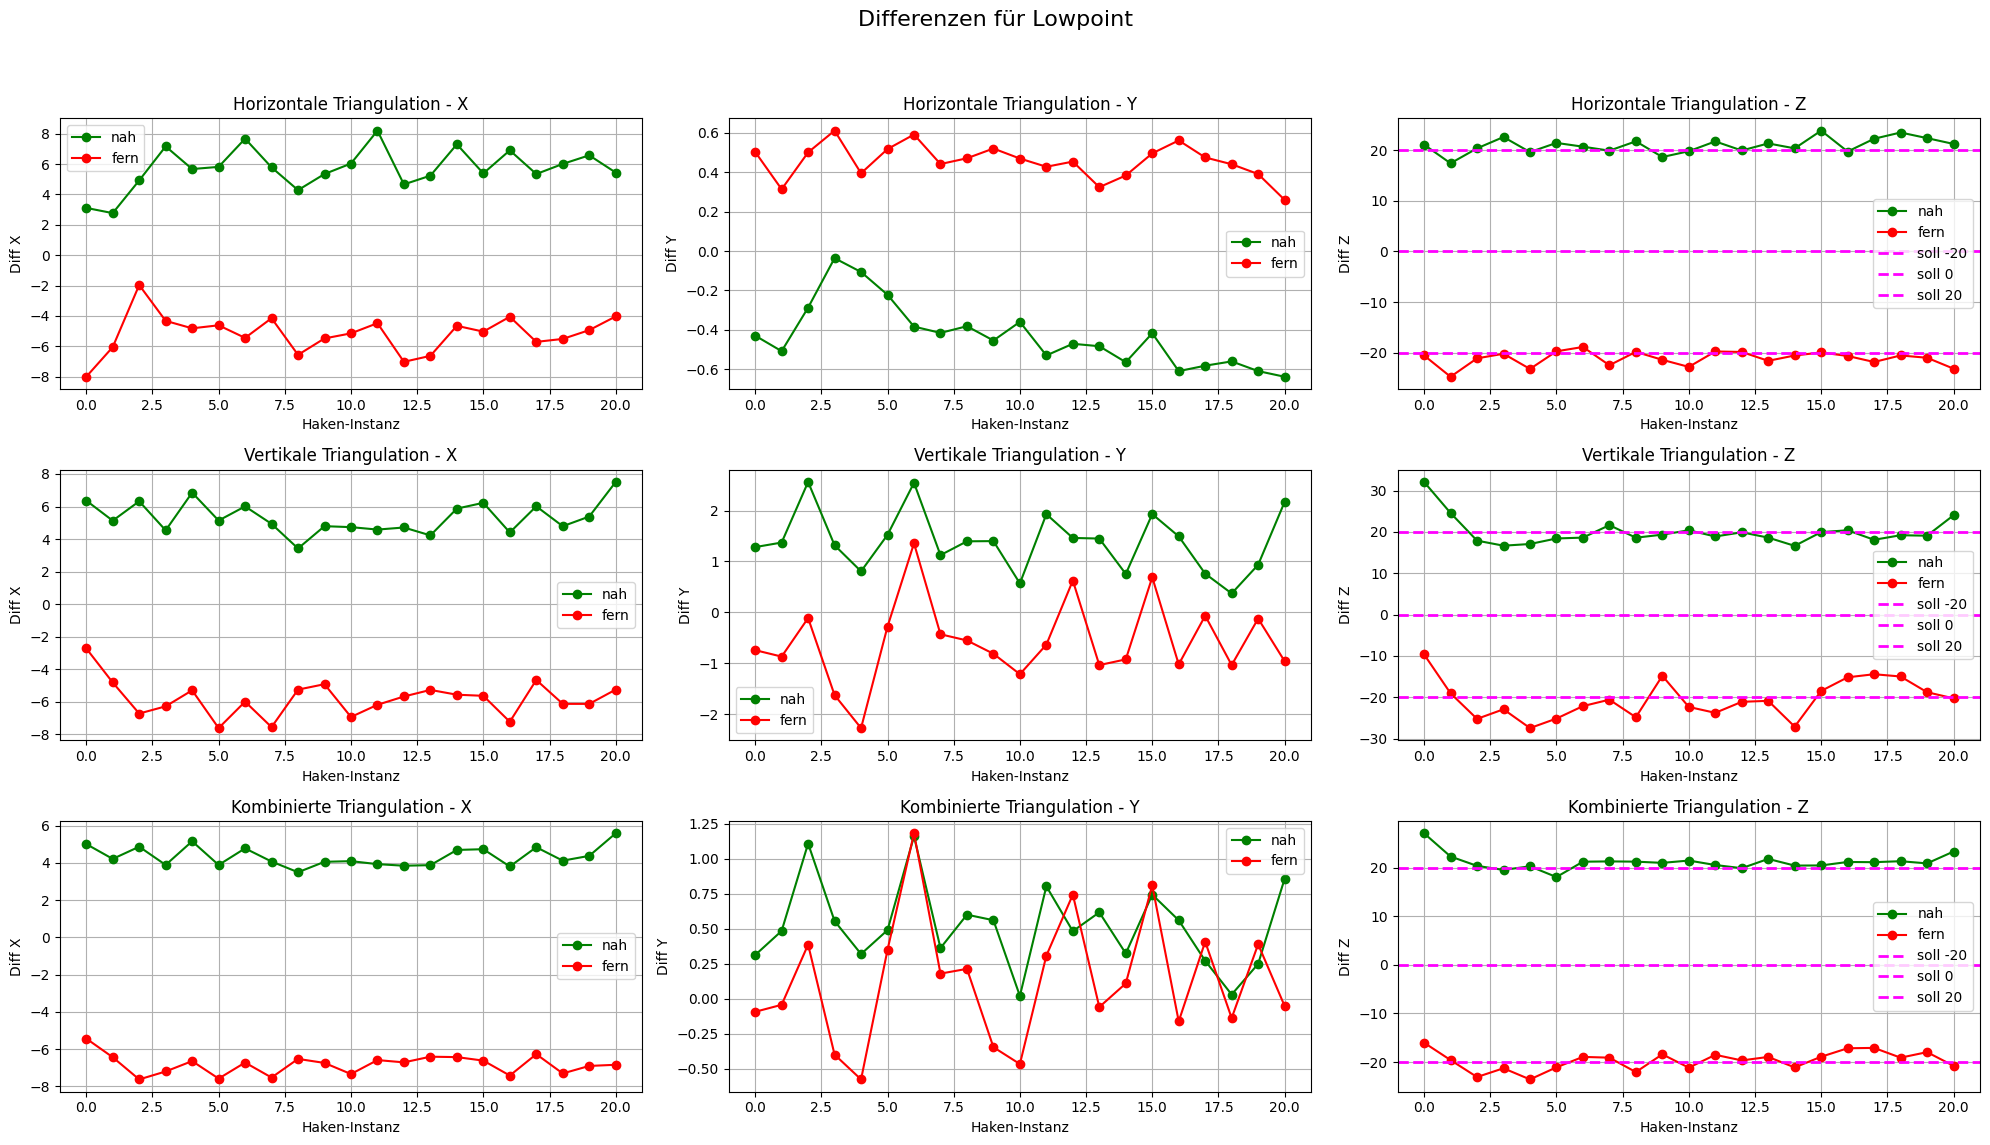

In [ ]:
plot_diffs(
    horizontal_far_diffs, horizontal_near_diffs,
    vertical_far_diffs, vertical_near_diffs,
    combined_far_diffs, combined_near_diffs,
    'tip'
)

plot_diffs(
    horizontal_far_diffs, horizontal_near_diffs,
    vertical_far_diffs, vertical_near_diffs,
    combined_far_diffs, combined_near_diffs,
    'lowpoint'
)